In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [252]:
# 针对默认的中文不支持乱码的情况 需要进行下列配置
# 针对windows
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据预处理

In [253]:
data = pd.read_excel(r"G:\shuxuejianmo\保留的特征数据.xlsx", sheet_name=0)
data

,主题,项目,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,人口,人口(万人),7869.340000,8022.990000,8119.810000,8192.440000,8281.090000,8315.110000,8381.470000,8423.500000,8446.190000,8469.090000,8477.260000
1,生产总值,生产总值-GDP总量(亿元),41383.870000,45952.650000,50660.200000,55580.110000,60359.430000,65552.000000,70665.706829,75752.201492,80827.711935,85556.133874,88683.214629
2,生产总值,生产总值-第一产业-农林消费部门(亿元),2409.240000,2736.861413,3057.823361,3228.538808,3358.613217,3636.080723,3690.609595,3568.541188,3591.607577,3726.607453,3916.811805
3,生产总值,生产总值-第二产业-总量(亿元),21853.600000,23739.961441,25612.909653,27298.131018,28907.535735,30700.410016,32013.022298,34514.332682,36533.741981,37730.144365,38183.225573
4,生产总值,生产总值-第三产业-总量(亿元),17121.030000,19475.827147,21989.466986,25053.440174,28093.281047,31215.509262,34962.074936,37669.327622,40702.362377,44099.382056,46583.177251
5,能源消费量,能源消费量-能源消费量（万tce）,23539.314431,26860.025812,27999.218108,28203.104275,28170.505765,29033.608068,29947.976618,30669.886457,31373.126649,32227.505385,31437.997554
6,能源消费量,能源消费量-第一产业-能源消费量-农林消费部门（万tce）,345.355807,393.867027,448.948695,362.176279,383.723705,429.373902,433.462151,440.486350,457.994663,438.576122,423.781819
7,能源消费量,能源消费量-第二产业-总量（万tce）,20113.072184,23145.467953,23869.217340,23889.136632,23670.133486,24261.962681,24929.674766,25317.555852,25580.655509,26196.116806,25325.993062
8,能源消费量,能源消费量-第三产业-总量（万tce）,1932.840815,2115.564002,2308.963964,2481.884381,2644.196782,2776.110620,2878.533819,3049.201396,3300.789574,3522.384771,3507.618087
9,能源消费量,能源消费量-居民生活-居民生活消费（万tce）,1148.045626,1205.126830,1372.088109,1469.906984,1472.451792,1566.160865,1706.305882,1862.642859,2033.686903,2070.427685,2180.604586


In [254]:
# 删除主题，保留具体项目作为特征
del data['主题']

In [255]:
new_columns = list(data["项目"])
new_columns.insert(0, "年份")

In [256]:
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
项目,人口(万人),生产总值-GDP总量(亿元),生产总值-第一产业-农林消费部门(亿元),生产总值-第二产业-总量(亿元),生产总值-第三产业-总量(亿元),能源消费量-能源消费量（万tce）,能源消费量-第一产业-能源消费量-农林消费部门（万tce）,能源消费量-第二产业-总量（万tce）,能源消费量-第三产业-总量（万tce）,能源消费量-居民生活-居民生活消费（万tce）,...,碳排放量-居民生活-居民生活消费(万tCO2),能源消费部门碳排放因子-第一产业,能源消费部门碳排放因子-第二产业,能源消费部门碳排放因子-第三产业,能源消费部门碳排放因子-居民生活-居民生活消费,能源供应部门碳排放因子-发电,能源供应部门碳排放因子-供热,能源供应部门碳排放因子-其他转换,能源供应部门碳排放因子-损失,外地调入电力碳排放因子-外地调入电力碳排放因子
2010,7869.34,41383.9,2409.24,21853.6,17121,23539.3,345.356,20113.1,1932.84,1148.05,...,4340,11.0846,14.9799,31.0792,9.37518,6.41272,12.2652,9.31884,8.94065,4.50762
2011,8022.99,45952.7,2736.86,23740,19475.8,26860,393.867,23145.5,2115.56,1205.13,...,4601.82,11.225,15.0052,31.3768,9.47464,6.55673,4.32148,9.47305,9.02645,4.45854
2012,8119.81,50660.2,3057.82,25612.9,21989.5,27999.2,448.949,23869.2,2308.96,1372.09,...,5141.28,11.0361,15.1073,28.5958,6.42469,6.36288,8.99976,6.36288,9.02072,4.0325
2013,8192.44,55580.1,3228.54,27298.1,25053.4,28203.1,362.176,23889.1,2481.88,1469.91,...,5721.34,11.034,15.1331,31.1449,9.45099,6.30165,13.2855,9.26824,9.14637,3.54234
2014,8281.09,60359.4,3358.61,28907.5,28093.3,28170.5,383.724,23670.1,2644.2,1472.45,...,4968.37,10.2232,14.5533,29.58,9.39687,6.4284,13.1134,9.42603,8.53949,2.55718
2015,8315.11,65552,3636.08,30700.4,31215.5,29033.6,429.374,24262,2776.11,1566.16,...,5495.89,10.5509,14.5009,30.4381,9.60344,6.40762,13.3421,9.51421,8.95221,2.56643
2016,8381.47,70665.7,3690.61,32013,34962.1,29948,433.462,24929.7,2878.53,1706.31,...,6131.85,10.5054,14.5242,30.5317,9.71345,6.40459,13.8146,9.59501,8.82372,2.42054
2017,8423.5,75752.2,3568.54,34514.3,37669.3,30669.9,440.486,25317.6,3049.2,1862.64,...,6706.67,10.4761,14.7509,30.6309,9.79549,6.37729,12.2627,9.65497,8.89006,3.0688
2018,8446.19,80827.7,3591.61,36533.7,40702.4,31373.1,457.995,25580.7,3300.79,2033.69,...,7277.52,10.3756,15.1012,31.3675,10.2211,6.35275,12.722,10.0977,9.34875,3.53128


In [257]:
data = data[1:]
data = pd.DataFrame(data.reset_index().values, columns=new_columns)
data

,年份,人口(万人),生产总值-GDP总量(亿元),生产总值-第一产业-农林消费部门(亿元),生产总值-第二产业-总量(亿元),生产总值-第三产业-总量(亿元),能源消费量-能源消费量（万tce）,能源消费量-第一产业-能源消费量-农林消费部门（万tce）,能源消费量-第二产业-总量（万tce）,能源消费量-第三产业-总量（万tce）,...,碳排放量-居民生活-居民生活消费(万tCO2),能源消费部门碳排放因子-第一产业,能源消费部门碳排放因子-第二产业,能源消费部门碳排放因子-第三产业,能源消费部门碳排放因子-居民生活-居民生活消费,能源供应部门碳排放因子-发电,能源供应部门碳排放因子-供热,能源供应部门碳排放因子-其他转换,能源供应部门碳排放因子-损失,外地调入电力碳排放因子-外地调入电力碳排放因子
0,2010,7869.34,41383.9,2409.24,21853.6,17121,23539.3,345.356,20113.1,1932.84,...,4340,11.0846,14.9799,31.0792,9.37518,6.41272,12.2652,9.31884,8.94065,4.50762
1,2011,8022.99,45952.7,2736.86,23740,19475.8,26860,393.867,23145.5,2115.56,...,4601.82,11.225,15.0052,31.3768,9.47464,6.55673,4.32148,9.47305,9.02645,4.45854
2,2012,8119.81,50660.2,3057.82,25612.9,21989.5,27999.2,448.949,23869.2,2308.96,...,5141.28,11.0361,15.1073,28.5958,6.42469,6.36288,8.99976,6.36288,9.02072,4.0325
3,2013,8192.44,55580.1,3228.54,27298.1,25053.4,28203.1,362.176,23889.1,2481.88,...,5721.34,11.034,15.1331,31.1449,9.45099,6.30165,13.2855,9.26824,9.14637,3.54234
4,2014,8281.09,60359.4,3358.61,28907.5,28093.3,28170.5,383.724,23670.1,2644.2,...,4968.37,10.2232,14.5533,29.58,9.39687,6.4284,13.1134,9.42603,8.53949,2.55718
5,2015,8315.11,65552,3636.08,30700.4,31215.5,29033.6,429.374,24262,2776.11,...,5495.89,10.5509,14.5009,30.4381,9.60344,6.40762,13.3421,9.51421,8.95221,2.56643
6,2016,8381.47,70665.7,3690.61,32013,34962.1,29948,433.462,24929.7,2878.53,...,6131.85,10.5054,14.5242,30.5317,9.71345,6.40459,13.8146,9.59501,8.82372,2.42054
7,2017,8423.5,75752.2,3568.54,34514.3,37669.3,30669.9,440.486,25317.6,3049.2,...,6706.67,10.4761,14.7509,30.6309,9.79549,6.37729,12.2627,9.65497,8.89006,3.0688
8,2018,8446.19,80827.7,3591.61,36533.7,40702.4,31373.1,457.995,25580.7,3300.79,...,7277.52,10.3756,15.1012,31.3675,10.2211,6.35275,12.722,10.0977,9.34875,3.53128
9,2019,8469.09,85556.1,3726.61,37730.1,44099.4,32227.5,438.576,26196.1,3522.38,...,7431.55,10.4282,15.2387,31.3058,10.2851,6.3377,13.4029,9.99951,9.30615,3.83643


In [258]:
data.columns

Index(['年份', '人口(万人)', '生产总值-GDP总量(亿元)', '生产总值-第一产业-农林消费部门(亿元)',
       '生产总值-第二产业-总量(亿元)', '生产总值-第三产业-总量(亿元)', '能源消费量-能源消费量（万tce）',
       '能源消费量-第一产业-能源消费量-农林消费部门（万tce）', '能源消费量-第二产业-总量（万tce）',
       '能源消费量-第三产业-总量（万tce）', '能源消费量-居民生活-居民生活消费（万tce）', '产业能耗结构-第一产业',
       '产业能耗结构-第二产业', '产业能耗结构-第三产业', '产业能耗结构-居民生活-居民生活消费',
       '能耗品种结构-煤炭消费量-总量（万tce）', '能耗品种结构-油品消费量-总量（万tce）',
       '能耗品种结构-天然气消费量-总量（万tce）', '能耗品种结构-新能源-总量（万tce）',
       '能耗品种结构-外地调入电-总量（万tce）', '碳排放量-碳排放量-总量(万tCO2)',
       '碳排放量-第一产业-农林消费部门(万tCO2)', '碳排放量-第二产业-工业消费部门(万tCO2)',
       '碳排放量-第三产业-总量(万tCO2)', '碳排放量-居民生活-居民生活消费(万tCO2)', '能源消费部门碳排放因子-第一产业',
       '能源消费部门碳排放因子-第二产业', '能源消费部门碳排放因子-第三产业', '能源消费部门碳排放因子-居民生活-居民生活消费',
       '能源供应部门碳排放因子-发电', '能源供应部门碳排放因子-供热', '能源供应部门碳排放因子-其他转换',
       '能源供应部门碳排放因子-损失', '外地调入电力碳排放因子-外地调入电力碳排放因子'],
      dtype='object')

# 问题一：区域碳排放量以及经济、人口、能源消费量的现状分析

## （1）建立指标与指标体系

### 要求1：指标能够描述某区域经济、人口、能源消费量和碳排放量的状况；

In [259]:
r1_data = data[["年份", "人口(万人)", "生产总值-GDP总量(亿元)", "能源消费量-能源消费量（万tce）"]].copy()
r1_data["碳排放量（万tCO2）"] = data["碳排放量-碳排放量-总量(万tCO2)"]
r1_data

,年份,人口(万人),生产总值-GDP总量(亿元),能源消费量-能源消费量（万tce）,碳排放量（万tCO2）
0,2010,7869.34,41383.9,23539.3,56360.1
1,2011,8022.99,45952.7,26860,65193.3
2,2012,8119.81,50660.2,27999.2,67502.6
3,2013,8192.44,55580.1,28203.1,66749.4
4,2014,8281.09,60359.4,28170.5,64853.3
5,2015,8315.11,65552,29033.6,66074.8
6,2016,8381.47,70665.7,29948,68526.1
7,2017,8423.5,75752.2,30669.9,70451.6
8,2018,8446.19,80827.7,31373.1,71502
9,2019,8469.09,85556.1,32227.5,74096.3


### 要求2：指标能够描述各部门（能源供应部门、工业消费部门、建筑消费部门、交通消费部门、居民生活消费、农林消费部门）的碳排放状况；

In [260]:
r2_data = data[["年份", 
                  "碳排放量-第一产业-农林消费部门(万tCO2)", 
                  "碳排放量-第二产业-工业消费部门(万tCO2)",
                  "碳排放量-第三产业-总量(万tCO2)",
                  "碳排放量-居民生活-居民生活消费(万tCO2)"]].copy()

r2_data.columns = ["年份", 
                     "农林消费部门碳排放量（万tCO2）", 
                     "工业消费部门碳排放量（万tCO2）", 
                     "交通和建筑消费部门碳排放量（万tCO2）", 
                     "居民生活消费碳排放量（万tCO2）"]
r2_data

,年份,农林消费部门碳排放量（万tCO2）,工业消费部门碳排放量（万tCO2）,交通和建筑消费部门碳排放量（万tCO2）,居民生活消费碳排放量（万tCO2）
0,2010,896.07,45225.7,5898.28,4340
1,2011,1031.18,52975.8,6584.56,4601.82
2,2012,1165.28,54048.3,7147.77,5141.28
3,2013,1007.48,52229.1,7791.47,5721.34
4,2014,1020.85,51188,7676.08,4968.37
5,2015,1162.51,51101.9,8314.53,5495.89
6,2016,1211.03,52382.2,8801.02,6131.85
7,2017,1245.02,52975.8,9524.01,6706.67
8,2018,1295.49,52506.9,10422.1,7277.52
9,2019,1278.38,54235.4,11151,7431.55


### 要求3：指标体系能够描述各主要指标之间的相互关系；

In [261]:
# GDP与碳排放强度关系（碳排放总量 / GDP）
# 能源消费量与碳排放强度关系（碳排放总量 / 能源消费量）
r3_data = data[["年份", "生产总值-GDP总量(亿元)", "能源消费量-能源消费量（万tce）", "碳排放量-碳排放量-总量(万tCO2)"]].copy()
r3_data["单位GDP碳排放量"] = r3_data["碳排放量-碳排放量-总量(万tCO2)"] / r3_data["生产总值-GDP总量(亿元)"]
r3_data["单位能源消费量碳排放量"] = r3_data["碳排放量-碳排放量-总量(万tCO2)"] / r3_data["能源消费量-能源消费量（万tce）"]
r3_data["单位GDP能源消费量"] = r3_data["能源消费量-能源消费量（万tce）"] / r3_data["生产总值-GDP总量(亿元)"]

r3_data = r3_data[["年份", "单位GDP碳排放量", "单位能源消费量碳排放量", "单位GDP能源消费量"]]
r3_data


,年份,单位GDP碳排放量,单位能源消费量碳排放量,单位GDP能源消费量
0,2010,1.36188,2.39429,0.568804
1,2011,1.41871,2.42715,0.584515
2,2012,1.33246,2.41087,0.552687
3,2013,1.20096,2.36674,0.507432
4,2014,1.07445,2.30217,0.466713
5,2015,1.00798,2.2758,0.44291
6,2016,0.969722,2.28817,0.423798
7,2017,0.930027,2.29709,0.404871
8,2018,0.884622,2.27908,0.388148
9,2019,0.866055,2.29916,0.376683


### 要求4、部分指标的变化（同比或环比）可以成为碳排放量预测的基础。

pct_change函数用于计算序列、行或列每个元素与其前一个元素之间的相对百分比变化   
DataFrame/Series.pct_change(periods=1, fill_method='pad', limit=None, freq=None, **kwargs)
+ periods表示向前计算的时间周期，默认是1；
+ fill_method是在求百分比变化时使用的插值方法，默认是‘pad’（指使用前一个非缺失值填充）；
+ limit表示最多处理的非缺失值的个数；
+ freq参数可以用来指定日期变量的频率，不能为空。

In [262]:
r4_data = data[["年份", "人口(万人)","生产总值-GDP总量(亿元)", "能源消费量-能源消费量（万tce）","碳排放量-碳排放量-总量(万tCO2)"]].copy()


r4_data["生产总值的环比增长率(%)"] = r4_data["生产总值-GDP总量(亿元)"].pct_change().fillna(0) * 100
r4_data["能源消费量的环比增长率(%)"] = r4_data["能源消费量-能源消费量（万tce）"].pct_change().fillna(0) * 100
r4_data["人口的环比增长率(%)"] = r4_data["人口(万人)"].pct_change().fillna(0) * 100
r4_data["碳排放量的环比增长率(%)"] = r4_data["碳排放量-碳排放量-总量(万tCO2)"].pct_change().fillna(0) * 100

r4_data = r4_data[["年份", "生产总值的环比增长率(%)", "能源消费量的环比增长率(%)","人口的环比增长率(%)","碳排放量的环比增长率(%)"]]
r4_data

,年份,生产总值的环比增长率(%),能源消费量的环比增长率(%),人口的环比增长率(%),碳排放量的环比增长率(%)
0,2010,0.000000,0.000000,0.000000,0.000000
1,2011,11.040002,14.107086,1.952514,15.672964
2,2012,10.244349,4.241218,1.206782,3.542189
3,2013,9.711588,0.728185,0.894479,-1.115864
4,2014,8.598975,-0.115585,1.082095,-2.840625
5,2015,8.602749,3.063851,0.410815,1.883535
6,2016,7.800993,3.149345,0.798065,3.709908
7,2017,7.197968,2.410546,0.501463,2.809779
8,2018,6.700149,2.292934,0.269365,1.491018
9,2019,5.850001,2.723282,0.271128,3.628329


In [263]:
# 合并上述数据
merged_data = pd.merge(r1_data, r2_data, on="年份")
merged_data = pd.merge(merged_data, r3_data, on="年份")
merged_data = pd.merge(merged_data, r4_data, on="年份")
merged_data

,年份,人口(万人),生产总值-GDP总量(亿元),能源消费量-能源消费量（万tce）,碳排放量（万tCO2）,农林消费部门碳排放量（万tCO2）,工业消费部门碳排放量（万tCO2）,交通和建筑消费部门碳排放量（万tCO2）,居民生活消费碳排放量（万tCO2）,单位GDP碳排放量,单位能源消费量碳排放量,单位GDP能源消费量,生产总值的环比增长率(%),能源消费量的环比增长率(%),人口的环比增长率(%),碳排放量的环比增长率(%)
0,2010,7869.34,41383.9,23539.3,56360.1,896.07,45225.7,5898.28,4340,1.36188,2.39429,0.568804,0.000000,0.000000,0.000000,0.000000
1,2011,8022.99,45952.7,26860,65193.3,1031.18,52975.8,6584.56,4601.82,1.41871,2.42715,0.584515,11.040002,14.107086,1.952514,15.672964
2,2012,8119.81,50660.2,27999.2,67502.6,1165.28,54048.3,7147.77,5141.28,1.33246,2.41087,0.552687,10.244349,4.241218,1.206782,3.542189
3,2013,8192.44,55580.1,28203.1,66749.4,1007.48,52229.1,7791.47,5721.34,1.20096,2.36674,0.507432,9.711588,0.728185,0.894479,-1.115864
4,2014,8281.09,60359.4,28170.5,64853.3,1020.85,51188,7676.08,4968.37,1.07445,2.30217,0.466713,8.598975,-0.115585,1.082095,-2.840625
5,2015,8315.11,65552,29033.6,66074.8,1162.51,51101.9,8314.53,5495.89,1.00798,2.2758,0.44291,8.602749,3.063851,0.410815,1.883535
6,2016,8381.47,70665.7,29948,68526.1,1211.03,52382.2,8801.02,6131.85,0.969722,2.28817,0.423798,7.800993,3.149345,0.798065,3.709908
7,2017,8423.5,75752.2,30669.9,70451.6,1245.02,52975.8,9524.01,6706.67,0.930027,2.29709,0.404871,7.197968,2.410546,0.501463,2.809779
8,2018,8446.19,80827.7,31373.1,71502,1295.49,52506.9,10422.1,7277.52,0.884622,2.27908,0.388148,6.700149,2.292934,0.269365,1.491018
9,2019,8469.09,85556.1,32227.5,74096.3,1278.38,54235.4,11151,7431.55,0.866055,2.29916,0.376683,5.850001,2.723282,0.271128,3.628329


In [264]:
merged_data.columns

Index(['年份', '人口(万人)', '生产总值-GDP总量(亿元)', '能源消费量-能源消费量（万tce）', '碳排放量（万tCO2）',
       '农林消费部门碳排放量（万tCO2）', '工业消费部门碳排放量（万tCO2）', '交通和建筑消费部门碳排放量（万tCO2）',
       '居民生活消费碳排放量（万tCO2）', '单位GDP碳排放量', '单位能源消费量碳排放量', '单位GDP能源消费量',
       '生产总值的环比增长率(%)', '能源消费量的环比增长率(%)', '人口的环比增长率(%)', '碳排放量的环比增长率(%)'],
      dtype='object')

In [265]:
data.columns

Index(['年份', '人口(万人)', '生产总值-GDP总量(亿元)', '生产总值-第一产业-农林消费部门(亿元)',
       '生产总值-第二产业-总量(亿元)', '生产总值-第三产业-总量(亿元)', '能源消费量-能源消费量（万tce）',
       '能源消费量-第一产业-能源消费量-农林消费部门（万tce）', '能源消费量-第二产业-总量（万tce）',
       '能源消费量-第三产业-总量（万tce）', '能源消费量-居民生活-居民生活消费（万tce）', '产业能耗结构-第一产业',
       '产业能耗结构-第二产业', '产业能耗结构-第三产业', '产业能耗结构-居民生活-居民生活消费',
       '能耗品种结构-煤炭消费量-总量（万tce）', '能耗品种结构-油品消费量-总量（万tce）',
       '能耗品种结构-天然气消费量-总量（万tce）', '能耗品种结构-新能源-总量（万tce）',
       '能耗品种结构-外地调入电-总量（万tce）', '碳排放量-碳排放量-总量(万tCO2)',
       '碳排放量-第一产业-农林消费部门(万tCO2)', '碳排放量-第二产业-工业消费部门(万tCO2)',
       '碳排放量-第三产业-总量(万tCO2)', '碳排放量-居民生活-居民生活消费(万tCO2)', '能源消费部门碳排放因子-第一产业',
       '能源消费部门碳排放因子-第二产业', '能源消费部门碳排放因子-第三产业', '能源消费部门碳排放因子-居民生活-居民生活消费',
       '能源供应部门碳排放因子-发电', '能源供应部门碳排放因子-供热', '能源供应部门碳排放因子-其他转换',
       '能源供应部门碳排放因子-损失', '外地调入电力碳排放因子-外地调入电力碳排放因子'],
      dtype='object')

In [266]:
data.shape

(11, 34)

In [267]:
data = pd.concat([
    merged_data[['单位GDP碳排放量', '单位能源消费量碳排放量', '单位GDP能源消费量',
                 '生产总值的环比增长率(%)', '能源消费量的环比增长率(%)', '人口的环比增长率(%)','碳排放量的环比增长率(%)']],
    data
],axis=1)
data

,单位GDP碳排放量,单位能源消费量碳排放量,单位GDP能源消费量,生产总值的环比增长率(%),能源消费量的环比增长率(%),人口的环比增长率(%),碳排放量的环比增长率(%),年份,人口(万人),生产总值-GDP总量(亿元),...,碳排放量-居民生活-居民生活消费(万tCO2),能源消费部门碳排放因子-第一产业,能源消费部门碳排放因子-第二产业,能源消费部门碳排放因子-第三产业,能源消费部门碳排放因子-居民生活-居民生活消费,能源供应部门碳排放因子-发电,能源供应部门碳排放因子-供热,能源供应部门碳排放因子-其他转换,能源供应部门碳排放因子-损失,外地调入电力碳排放因子-外地调入电力碳排放因子
0,1.36188,2.39429,0.568804,0.000000,0.000000,0.000000,0.000000,2010,7869.34,41383.9,...,4340,11.0846,14.9799,31.0792,9.37518,6.41272,12.2652,9.31884,8.94065,4.50762
1,1.41871,2.42715,0.584515,11.040002,14.107086,1.952514,15.672964,2011,8022.99,45952.7,...,4601.82,11.225,15.0052,31.3768,9.47464,6.55673,4.32148,9.47305,9.02645,4.45854
2,1.33246,2.41087,0.552687,10.244349,4.241218,1.206782,3.542189,2012,8119.81,50660.2,...,5141.28,11.0361,15.1073,28.5958,6.42469,6.36288,8.99976,6.36288,9.02072,4.0325
3,1.20096,2.36674,0.507432,9.711588,0.728185,0.894479,-1.115864,2013,8192.44,55580.1,...,5721.34,11.034,15.1331,31.1449,9.45099,6.30165,13.2855,9.26824,9.14637,3.54234
4,1.07445,2.30217,0.466713,8.598975,-0.115585,1.082095,-2.840625,2014,8281.09,60359.4,...,4968.37,10.2232,14.5533,29.58,9.39687,6.4284,13.1134,9.42603,8.53949,2.55718
5,1.00798,2.2758,0.44291,8.602749,3.063851,0.410815,1.883535,2015,8315.11,65552,...,5495.89,10.5509,14.5009,30.4381,9.60344,6.40762,13.3421,9.51421,8.95221,2.56643
6,0.969722,2.28817,0.423798,7.800993,3.149345,0.798065,3.709908,2016,8381.47,70665.7,...,6131.85,10.5054,14.5242,30.5317,9.71345,6.40459,13.8146,9.59501,8.82372,2.42054
7,0.930027,2.29709,0.404871,7.197968,2.410546,0.501463,2.809779,2017,8423.5,75752.2,...,6706.67,10.4761,14.7509,30.6309,9.79549,6.37729,12.2627,9.65497,8.89006,3.0688
8,0.884622,2.27908,0.388148,6.700149,2.292934,0.269365,1.491018,2018,8446.19,80827.7,...,7277.52,10.3756,15.1012,31.3675,10.2211,6.35275,12.722,10.0977,9.34875,3.53128
9,0.866055,2.29916,0.376683,5.850001,2.723282,0.271128,3.628329,2019,8469.09,85556.1,...,7431.55,10.4282,15.2387,31.3058,10.2851,6.3377,13.4029,9.99951,9.30615,3.83643


## （2）分析区域碳排放量以及经济、人口、能源消费量的现状

In [268]:
carbon_columns = ["年份", 
                     "碳排放量-碳排放量-总量(万tCO2)", 
                     "碳排放量-第一产业-农林消费部门(万tCO2)", 
                     "碳排放量-第二产业-工业消费部门(万tCO2)", 
                     "碳排放量-第三产业-总量(万tCO2)", 
                     "碳排放量-居民生活-居民生活消费(万tCO2)"]

carbon_data = data[carbon_columns]

# 2011-2020年碳排放量的数据
carbon_data_filtered = carbon_data[(carbon_data["年份"] >= 2011) & (carbon_data["年份"] <= 2020)]
carbon_data_filtered

,年份,碳排放量-碳排放量-总量(万tCO2),碳排放量-第一产业-农林消费部门(万tCO2),碳排放量-第二产业-工业消费部门(万tCO2),碳排放量-第三产业-总量(万tCO2),碳排放量-居民生活-居民生活消费(万tCO2)
1,2011,65193.3,1031.18,52975.8,6584.56,4601.82
2,2012,67502.6,1165.28,54048.3,7147.77,5141.28
3,2013,66749.4,1007.48,52229.1,7791.47,5721.34
4,2014,64853.3,1020.85,51188,7676.08,4968.37
5,2015,66074.8,1162.51,51101.9,8314.53,5495.89
6,2016,68526.1,1211.03,52382.2,8801.02,6131.85
7,2017,70451.6,1245.02,52975.8,9524.01,6706.67
8,2018,71502,1295.49,52506.9,10422.1,7277.52
9,2019,74096.3,1278.38,54235.4,11151,7431.55
10,2020,72633.3,1238.76,52954,10906,7534.49


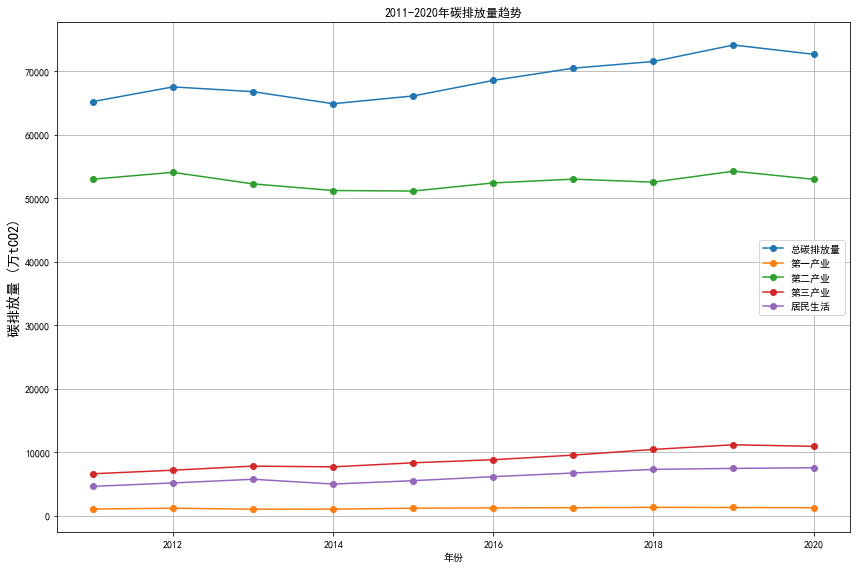

In [269]:
fig, ax = plt.subplots(figsize=(12, 8))

carbon_data_filtered.plot(x="年份", y="碳排放量-碳排放量-总量(万tCO2)", ax=ax, marker='o', label="总碳排放量")
carbon_data_filtered.plot(x="年份", y="碳排放量-第一产业-农林消费部门(万tCO2)", ax=ax, marker='o', label="第一产业")
carbon_data_filtered.plot(x="年份", y="碳排放量-第二产业-工业消费部门(万tCO2)", ax=ax, marker='o', label="第二产业")
carbon_data_filtered.plot(x="年份", y="碳排放量-第三产业-总量(万tCO2)", ax=ax, marker='o', label="第三产业")
carbon_data_filtered.plot(x="年份", y="碳排放量-居民生活-居民生活消费(万tCO2)", ax=ax, marker='o', label="居民生活")

ax.set_title("2011-2020年碳排放量趋势", fontsize=12)
ax.set_xlabel("年份", fontsize=10)
ax.set_ylabel("碳排放量 (万tCO2)", fontsize=14)
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

In [270]:
# 2011-2015年和2016-2020年两个时期的总碳排放量

total_carbon_emission_2011_2015 = carbon_data_filtered[carbon_data_filtered["年份"] <=2015]["碳排放量-碳排放量-总量(万tCO2)"].sum()
total_carbon_emission_2016_2020 = carbon_data_filtered[carbon_data_filtered["年份"] >=2016]["碳排放量-碳排放量-总量(万tCO2)"].sum()
total_carbon_emission_2011_2015, total_carbon_emission_2016_2020

(330373.4172891103, 357209.3402578106)

### 要求1：以2010年为基期，分析某区域十二五（2011-2015年）和十三五（2016-2020年）期间的碳排放量状况（如总量、变化趋势等）；

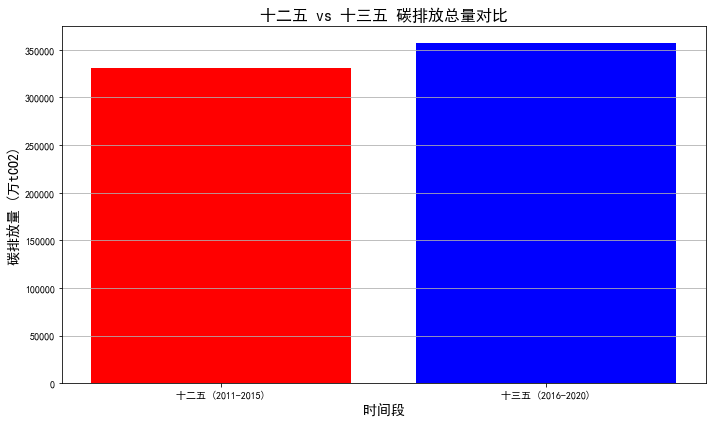

In [271]:
# 两个5年计划，碳排放总量还是增加的

periods = ["十二五 (2011-2015)", "十三五 (2016-2020)"]
emissions = [total_carbon_emission_2011_2015, total_carbon_emission_2016_2020]

plt.figure(figsize=(10, 6))
plt.bar(periods, emissions, color=['red', 'blue'])
plt.title("十二五 vs 十三五 碳排放总量对比", fontsize=16)
plt.ylabel("碳排放量 (万tCO2)", fontsize=14)
plt.xlabel("时间段", fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 要求2：分析对该区域碳排放量产生影响的各因素及其贡献

#### 相关性分析

In [272]:
carbon_data_filtered1 = carbon_data_filtered.loc[:,"碳排放量-碳排放量-总量(万tCO2)":]
carbon_data_filtered1 = carbon_data_filtered1.astype("float")

In [273]:
carbon_data_filtered1.corr()

,碳排放量-碳排放量-总量(万tCO2),碳排放量-第一产业-农林消费部门(万tCO2),碳排放量-第二产业-工业消费部门(万tCO2),碳排放量-第三产业-总量(万tCO2),碳排放量-居民生活-居民生活消费(万tCO2)
碳排放量-碳排放量-总量(万tCO2),1.000000,0.858171,0.586157,0.938957,0.957775
碳排放量-第一产业-农林消费部门(万tCO2),0.858171,1.000000,0.428931,0.828657,0.831986
碳排放量-第二产业-工业消费部门(万tCO2),0.586157,0.428931,1.000000,0.278407,0.347222
碳排放量-第三产业-总量(万tCO2),0.938957,0.828657,0.278407,1.000000,0.980408
碳排放量-居民生活-居民生活消费(万tCO2),0.957775,0.831986,0.347222,0.980408,1.000000


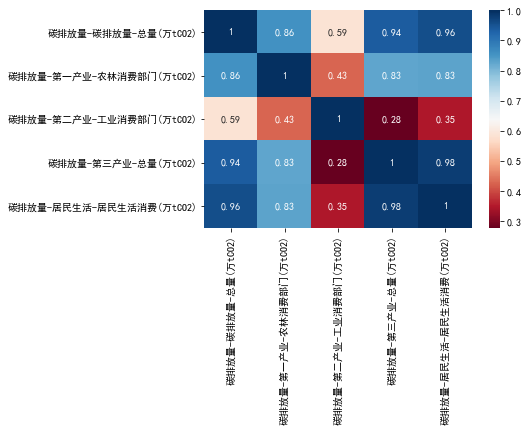

In [274]:
# 相关性矩阵热力图
# 强相关性的特征，需要进行删除或者降维操作
import seaborn as sns
sns.heatmap(carbon_data_filtered1.corr(), annot=True, cmap='RdBu', xticklabels=1, yticklabels=1)

In [275]:
carbon_emission_2011_2015 = carbon_data_filtered[carbon_data_filtered["年份"] <=2015].astype("float")
carbon_emission_2016_2020 = carbon_data_filtered[carbon_data_filtered["年份"] >=2016].astype("float")
carbon_emission_2011_2015.columns = ["".join(["十二五",x]) for x in carbon_emission_2011_2015.columns]
del carbon_emission_2011_2015["十二五年份"]
carbon_emission_2011_2015.reset_index(drop=True, inplace=True)

In [276]:
carbon_emission_2016_2020.columns = ["".join(["十三五",x]) for x in carbon_emission_2016_2020.columns]
del carbon_emission_2016_2020["十三五年份"]
carbon_emission_2016_2020.reset_index(drop=True, inplace=True)

In [277]:
carbon_emission_2_5 = pd.concat([carbon_emission_2011_2015,carbon_emission_2016_2020], axis=1)
carbon_emission_2_5

,十二五碳排放量-碳排放量-总量(万tCO2),十二五碳排放量-第一产业-农林消费部门(万tCO2),十二五碳排放量-第二产业-工业消费部门(万tCO2),十二五碳排放量-第三产业-总量(万tCO2),十二五碳排放量-居民生活-居民生活消费(万tCO2),十三五碳排放量-碳排放量-总量(万tCO2),十三五碳排放量-第一产业-农林消费部门(万tCO2),十三五碳排放量-第二产业-工业消费部门(万tCO2),十三五碳排放量-第三产业-总量(万tCO2),十三五碳排放量-居民生活-居民生活消费(万tCO2)
0,65193.342227,1031.176452,52975.786875,6584.556440,4601.822460,68526.124672,1211.033579,52382.223791,8801.015825,6131.851477
1,67502.613375,1165.275005,54048.281585,7147.774471,5141.282313,70451.557393,1245.019174,52975.849274,9524.014957,6706.673989
2,66749.375697,1007.477719,52229.084170,7791.472337,5721.341470,71502.002860,1295.487242,52506.880574,10422.113376,7277.521668
3,64853.276040,1020.852750,51187.980007,7676.076783,4968.366500,74096.331081,1278.384174,54235.438969,11150.957132,7431.550806
4,66074.809951,1162.511995,51101.873437,8314.530587,5495.893932,72633.324252,1238.759045,52954.048905,10906.027504,7534.488798


In [278]:
carbon_emission_2_5.corr()

,十二五碳排放量-碳排放量-总量(万tCO2),十二五碳排放量-第一产业-农林消费部门(万tCO2),十二五碳排放量-第二产业-工业消费部门(万tCO2),十二五碳排放量-第三产业-总量(万tCO2),十二五碳排放量-居民生活-居民生活消费(万tCO2),十三五碳排放量-碳排放量-总量(万tCO2),十三五碳排放量-第一产业-农林消费部门(万tCO2),十三五碳排放量-第二产业-工业消费部门(万tCO2),十三五碳排放量-第三产业-总量(万tCO2),十三五碳排放量-居民生活-居民生活消费(万tCO2)
十二五碳排放量-碳排放量-总量(万tCO2),1.000000,0.543120,0.591390,0.099154,0.561759,-0.221247,0.159267,-0.415844,-0.173513,0.002527
十二五碳排放量-第一产业-农林消费部门(万tCO2),0.543120,1.000000,0.223507,0.240406,0.174282,-0.007655,-0.412564,-0.055224,-0.012631,0.085759
十二五碳排放量-第二产业-工业消费部门(万tCO2),0.591390,0.223507,1.000000,-0.739192,-0.292621,-0.767016,-0.339634,-0.477699,-0.827616,-0.764453
十二五碳排放量-第三产业-总量(万tCO2),0.099154,0.240406,-0.739192,1.000000,0.793387,0.800069,0.526455,0.315146,0.897538,0.958643
十二五碳排放量-居民生活-居民生活消费(万tCO2),0.561759,0.174282,-0.292621,0.793387,1.000000,0.421746,0.640609,-0.143462,0.566294,0.715026
十三五碳排放量-碳排放量-总量(万tCO2),-0.221247,-0.007655,-0.767016,0.800069,0.421746,1.000000,0.646527,0.807469,0.976526,0.925937
十三五碳排放量-第一产业-农林消费部门(万tCO2),0.159267,-0.412564,-0.339634,0.526455,0.640609,0.646527,1.000000,0.378400,0.667987,0.683453
十三五碳排放量-第二产业-工业消费部门(万tCO2),-0.415844,-0.055224,-0.477699,0.315146,-0.143462,0.807469,0.378400,1.000000,0.664578,0.528976
十三五碳排放量-第三产业-总量(万tCO2),-0.173513,-0.012631,-0.827616,0.897538,0.566294,0.976526,0.667987,0.664578,1.000000,0.979149
十三五碳排放量-居民生活-居民生活消费(万tCO2),0.002527,0.085759,-0.764453,0.958643,0.715026,0.925937,0.683453,0.528976,0.979149,1.000000


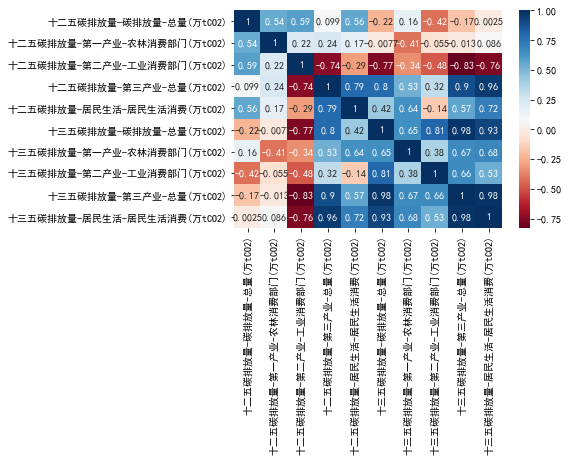

In [279]:
# 相关性矩阵热力图
# 强相关性的特征，需要进行删除或者降维操作
import seaborn as sns
sns.heatmap(carbon_emission_2_5.corr(), annot=True, cmap='RdBu', xticklabels=1, yticklabels=1)

#### 特征重要性

In [280]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from math import sqrt

In [281]:
data

,单位GDP碳排放量,单位能源消费量碳排放量,单位GDP能源消费量,生产总值的环比增长率(%),能源消费量的环比增长率(%),人口的环比增长率(%),碳排放量的环比增长率(%),年份,人口(万人),生产总值-GDP总量(亿元),...,碳排放量-居民生活-居民生活消费(万tCO2),能源消费部门碳排放因子-第一产业,能源消费部门碳排放因子-第二产业,能源消费部门碳排放因子-第三产业,能源消费部门碳排放因子-居民生活-居民生活消费,能源供应部门碳排放因子-发电,能源供应部门碳排放因子-供热,能源供应部门碳排放因子-其他转换,能源供应部门碳排放因子-损失,外地调入电力碳排放因子-外地调入电力碳排放因子
0,1.36188,2.39429,0.568804,0.000000,0.000000,0.000000,0.000000,2010,7869.34,41383.9,...,4340,11.0846,14.9799,31.0792,9.37518,6.41272,12.2652,9.31884,8.94065,4.50762
1,1.41871,2.42715,0.584515,11.040002,14.107086,1.952514,15.672964,2011,8022.99,45952.7,...,4601.82,11.225,15.0052,31.3768,9.47464,6.55673,4.32148,9.47305,9.02645,4.45854
2,1.33246,2.41087,0.552687,10.244349,4.241218,1.206782,3.542189,2012,8119.81,50660.2,...,5141.28,11.0361,15.1073,28.5958,6.42469,6.36288,8.99976,6.36288,9.02072,4.0325
3,1.20096,2.36674,0.507432,9.711588,0.728185,0.894479,-1.115864,2013,8192.44,55580.1,...,5721.34,11.034,15.1331,31.1449,9.45099,6.30165,13.2855,9.26824,9.14637,3.54234
4,1.07445,2.30217,0.466713,8.598975,-0.115585,1.082095,-2.840625,2014,8281.09,60359.4,...,4968.37,10.2232,14.5533,29.58,9.39687,6.4284,13.1134,9.42603,8.53949,2.55718
5,1.00798,2.2758,0.44291,8.602749,3.063851,0.410815,1.883535,2015,8315.11,65552,...,5495.89,10.5509,14.5009,30.4381,9.60344,6.40762,13.3421,9.51421,8.95221,2.56643
6,0.969722,2.28817,0.423798,7.800993,3.149345,0.798065,3.709908,2016,8381.47,70665.7,...,6131.85,10.5054,14.5242,30.5317,9.71345,6.40459,13.8146,9.59501,8.82372,2.42054
7,0.930027,2.29709,0.404871,7.197968,2.410546,0.501463,2.809779,2017,8423.5,75752.2,...,6706.67,10.4761,14.7509,30.6309,9.79549,6.37729,12.2627,9.65497,8.89006,3.0688
8,0.884622,2.27908,0.388148,6.700149,2.292934,0.269365,1.491018,2018,8446.19,80827.7,...,7277.52,10.3756,15.1012,31.3675,10.2211,6.35275,12.722,10.0977,9.34875,3.53128
9,0.866055,2.29916,0.376683,5.850001,2.723282,0.271128,3.628329,2019,8469.09,85556.1,...,7431.55,10.4282,15.2387,31.3058,10.2851,6.3377,13.4029,9.99951,9.30615,3.83643


In [282]:
data.columns

Index(['单位GDP碳排放量', '单位能源消费量碳排放量', '单位GDP能源消费量', '生产总值的环比增长率(%)',
       '能源消费量的环比增长率(%)', '人口的环比增长率(%)', '碳排放量的环比增长率(%)', '年份', '人口(万人)',
       '生产总值-GDP总量(亿元)', '生产总值-第一产业-农林消费部门(亿元)', '生产总值-第二产业-总量(亿元)',
       '生产总值-第三产业-总量(亿元)', '能源消费量-能源消费量（万tce）',
       '能源消费量-第一产业-能源消费量-农林消费部门（万tce）', '能源消费量-第二产业-总量（万tce）',
       '能源消费量-第三产业-总量（万tce）', '能源消费量-居民生活-居民生活消费（万tce）', '产业能耗结构-第一产业',
       '产业能耗结构-第二产业', '产业能耗结构-第三产业', '产业能耗结构-居民生活-居民生活消费',
       '能耗品种结构-煤炭消费量-总量（万tce）', '能耗品种结构-油品消费量-总量（万tce）',
       '能耗品种结构-天然气消费量-总量（万tce）', '能耗品种结构-新能源-总量（万tce）',
       '能耗品种结构-外地调入电-总量（万tce）', '碳排放量-碳排放量-总量(万tCO2)',
       '碳排放量-第一产业-农林消费部门(万tCO2)', '碳排放量-第二产业-工业消费部门(万tCO2)',
       '碳排放量-第三产业-总量(万tCO2)', '碳排放量-居民生活-居民生活消费(万tCO2)', '能源消费部门碳排放因子-第一产业',
       '能源消费部门碳排放因子-第二产业', '能源消费部门碳排放因子-第三产业', '能源消费部门碳排放因子-居民生活-居民生活消费',
       '能源供应部门碳排放因子-发电', '能源供应部门碳排放因子-供热', '能源供应部门碳排放因子-其他转换',
       '能源供应部门碳排放因子-损失', '外地调入电力碳排放因子-外地调入电力碳排放因子'],
      dtype='object')

In [283]:
# 训练数据
X = data[['单位GDP碳排放量', '单位能源消费量碳排放量', '单位GDP能源消费量', '年份', '人口(万人)',
       '生产总值-GDP总量(亿元)', '生产总值-第一产业-农林消费部门(亿元)', '生产总值-第二产业-总量(亿元)',
       '生产总值-第三产业-总量(亿元)', '能源消费量-能源消费量（万tce）',
       '能源消费量-第一产业-能源消费量-农林消费部门（万tce）', '能源消费量-第二产业-总量（万tce）',
       '能源消费量-第三产业-总量（万tce）', '能源消费量-居民生活-居民生活消费（万tce）', '产业能耗结构-第一产业',
       '产业能耗结构-第二产业', '产业能耗结构-第三产业', '产业能耗结构-居民生活-居民生活消费',
       '能耗品种结构-煤炭消费量-总量（万tce）', '能耗品种结构-油品消费量-总量（万tce）',
       '能耗品种结构-天然气消费量-总量（万tce）', '能耗品种结构-新能源-总量（万tce）',
       '能耗品种结构-外地调入电-总量（万tce）', 
       '碳排放量-第一产业-农林消费部门(万tCO2)', '碳排放量-第二产业-工业消费部门(万tCO2)',
       '碳排放量-第三产业-总量(万tCO2)', '碳排放量-居民生活-居民生活消费(万tCO2)', '能源消费部门碳排放因子-第一产业',
       '能源消费部门碳排放因子-第二产业', '能源消费部门碳排放因子-第三产业', '能源消费部门碳排放因子-居民生活-居民生活消费',
       '能源供应部门碳排放因子-发电', '能源供应部门碳排放因子-供热', '能源供应部门碳排放因子-其他转换',
       '能源供应部门碳排放因子-损失', '外地调入电力碳排放因子-外地调入电力碳排放因子']]
Y = data['碳排放量-碳排放量-总量(万tCO2)']

In [284]:
# object->float,为了计算
for i in X.columns:
    X[i]=X[i].map(float)
Y=Y.map(float)

In [285]:
X.dtypes,Y.dtypes

(单位GDP碳排放量                        float64
 单位能源消费量碳排放量                      float64
 单位GDP能源消费量                       float64
 年份                               float64
 人口(万人)                           float64
 生产总值-GDP总量(亿元)                   float64
 生产总值-第一产业-农林消费部门(亿元)             float64
 生产总值-第二产业-总量(亿元)                 float64
 生产总值-第三产业-总量(亿元)                 float64
 能源消费量-能源消费量（万tce）                float64
 能源消费量-第一产业-能源消费量-农林消费部门（万tce）    float64
 能源消费量-第二产业-总量（万tce）              float64
 能源消费量-第三产业-总量（万tce）              float64
 能源消费量-居民生活-居民生活消费（万tce）          float64
 产业能耗结构-第一产业                      float64
 产业能耗结构-第二产业                      float64
 产业能耗结构-第三产业                      float64
 产业能耗结构-居民生活-居民生活消费               float64
 能耗品种结构-煤炭消费量-总量（万tce）            float64
 能耗品种结构-油品消费量-总量（万tce）            float64
 能耗品种结构-天然气消费量-总量（万tce）           float64
 能耗品种结构-新能源-总量（万tce）              float64
 能耗品种结构-外地调入电-总量（万tce）            float64
 碳排放量-第一产业-农林消费部门(万tCO2)          

XGBoost模型评价结果：
R2 Score: 0.9997915255389986
MAE: 29.17353002127228
MSE: 4443.782463609796
RMSE: 66.66170162551956


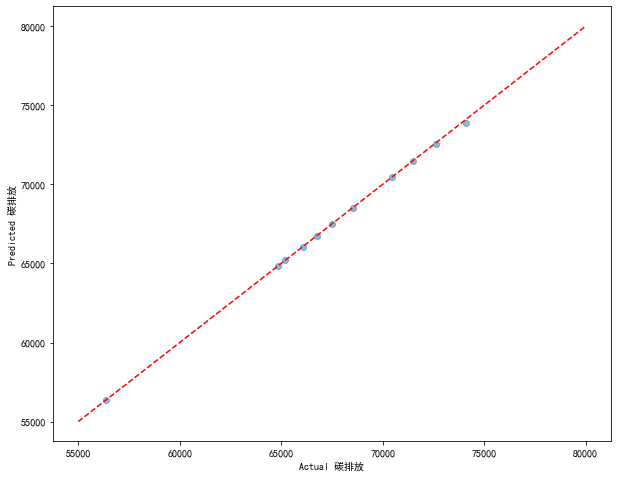

In [286]:
# xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
y_pred = xgb_model.predict(X)

# 模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(Y, y_pred))
print('MAE:', mean_absolute_error(Y, y_pred))
print('MSE:', mean_squared_error(Y, y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, y_pred)))

# 可视化模型预测与实际值的比较
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(Y, y_pred, alpha=0.5)
ax.plot([55000, 80000], [55000, 80000], '--', color='red')
ax.set_xlabel('Actual 碳排放')
ax.set_ylabel('Predicted 碳排放')
plt.show()

In [287]:
y_data = pd.DataFrame(Y)
y_data["y_pred"] = pd.DataFrame(y_pred)
y_data

,碳排放量-碳排放量-总量(万tCO2),y_pred
0,56360.051842,56361.308594
1,65193.342227,65191.253906
2,67502.613375,67491.890625
3,66749.375697,66742.000000
4,64853.276040,64846.960938
5,66074.809951,66072.773438
6,68526.124672,68521.687500
7,70451.557393,70442.093750
8,71502.002860,71489.367188
9,74096.331081,73882.210938


In [288]:
# 模型特征重要性
xgb_model.feature_importances_

array([0.12868117, 0.        , 0.        , 0.15429433, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01712448,
       0.        , 0.23222779, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00180245, 0.        ,
       0.        , 0.        , 0.        , 0.35918275, 0.00094023,
       0.        , 0.10175118, 0.        , 0.        , 0.        ,
       0.        , 0.00399567, 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

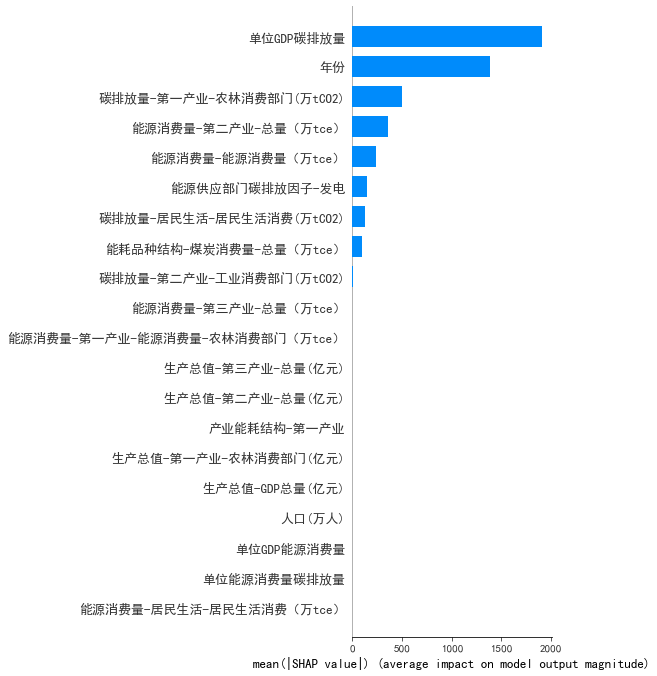

In [289]:
import shap,numba

# 初始化模型
explainer = shap.Explainer(xgb_model)

# 计算SHAP值
shap_values = explainer(X)

# 绘制SHAP摘要图
shap.summary_plot(shap_values, X, plot_type='bar')

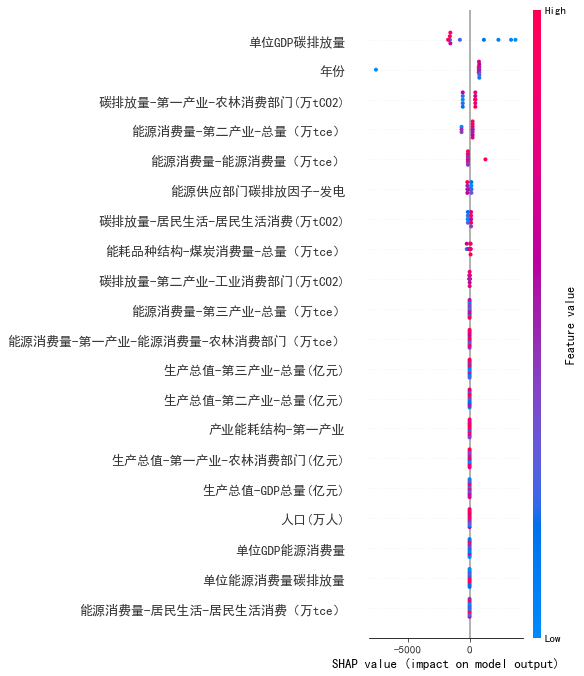

In [290]:
shap.summary_plot(shap_values, X)

### 要求 3：研判该区域实现碳达峰与碳中和需要面对的主要挑战，为该区域双碳（碳达峰与碳中和）路径规划中差异化的路径选择提供依据。

根据上面的进行总结

## （3）区域碳排放量以及经济、人口、能源消费量各指标及其关联模型

### 要求1：分析相关指标的变化（环比与同比）

In [291]:
data

,单位GDP碳排放量,单位能源消费量碳排放量,单位GDP能源消费量,生产总值的环比增长率(%),能源消费量的环比增长率(%),人口的环比增长率(%),碳排放量的环比增长率(%),年份,人口(万人),生产总值-GDP总量(亿元),...,碳排放量-居民生活-居民生活消费(万tCO2),能源消费部门碳排放因子-第一产业,能源消费部门碳排放因子-第二产业,能源消费部门碳排放因子-第三产业,能源消费部门碳排放因子-居民生活-居民生活消费,能源供应部门碳排放因子-发电,能源供应部门碳排放因子-供热,能源供应部门碳排放因子-其他转换,能源供应部门碳排放因子-损失,外地调入电力碳排放因子-外地调入电力碳排放因子
0,1.36188,2.39429,0.568804,0.000000,0.000000,0.000000,0.000000,2010,7869.34,41383.9,...,4340,11.0846,14.9799,31.0792,9.37518,6.41272,12.2652,9.31884,8.94065,4.50762
1,1.41871,2.42715,0.584515,11.040002,14.107086,1.952514,15.672964,2011,8022.99,45952.7,...,4601.82,11.225,15.0052,31.3768,9.47464,6.55673,4.32148,9.47305,9.02645,4.45854
2,1.33246,2.41087,0.552687,10.244349,4.241218,1.206782,3.542189,2012,8119.81,50660.2,...,5141.28,11.0361,15.1073,28.5958,6.42469,6.36288,8.99976,6.36288,9.02072,4.0325
3,1.20096,2.36674,0.507432,9.711588,0.728185,0.894479,-1.115864,2013,8192.44,55580.1,...,5721.34,11.034,15.1331,31.1449,9.45099,6.30165,13.2855,9.26824,9.14637,3.54234
4,1.07445,2.30217,0.466713,8.598975,-0.115585,1.082095,-2.840625,2014,8281.09,60359.4,...,4968.37,10.2232,14.5533,29.58,9.39687,6.4284,13.1134,9.42603,8.53949,2.55718
5,1.00798,2.2758,0.44291,8.602749,3.063851,0.410815,1.883535,2015,8315.11,65552,...,5495.89,10.5509,14.5009,30.4381,9.60344,6.40762,13.3421,9.51421,8.95221,2.56643
6,0.969722,2.28817,0.423798,7.800993,3.149345,0.798065,3.709908,2016,8381.47,70665.7,...,6131.85,10.5054,14.5242,30.5317,9.71345,6.40459,13.8146,9.59501,8.82372,2.42054
7,0.930027,2.29709,0.404871,7.197968,2.410546,0.501463,2.809779,2017,8423.5,75752.2,...,6706.67,10.4761,14.7509,30.6309,9.79549,6.37729,12.2627,9.65497,8.89006,3.0688
8,0.884622,2.27908,0.388148,6.700149,2.292934,0.269365,1.491018,2018,8446.19,80827.7,...,7277.52,10.3756,15.1012,31.3675,10.2211,6.35275,12.722,10.0977,9.34875,3.53128
9,0.866055,2.29916,0.376683,5.850001,2.723282,0.271128,3.628329,2019,8469.09,85556.1,...,7431.55,10.4282,15.2387,31.3058,10.2851,6.3377,13.4029,9.99951,9.30615,3.83643


In [292]:
# 计算环比增长率
def calculate_growth_rates(data, column):
    # 计算环比增长率，即当前值与前一个值的百分比变化
    chain_growth_rate = data[column].pct_change().fillna(0) * 100
    return chain_growth_rate

columns_to_analyze = ["人口(万人)", "生产总值-GDP总量(亿元)", "能源消费量-能源消费量（万tce）",'碳排放量-碳排放量-总量(万tCO2)']

# 只包含年份这一列
growth_data = data[["年份"]].copy()

for column in columns_to_analyze:
    # 调用calculate_growth_rates函数计算环比增长率
    chain_growth = calculate_growth_rates(data, column)
    
    # 将计算结果添加到growth_data数据框中，列名包括原列名和增长率类型
    growth_data["{}的环比增长率(%)".format(column.split("-")[0])] = chain_growth

growth_data

,年份,人口(万人)的环比增长率(%),生产总值的环比增长率(%),能源消费量的环比增长率(%),碳排放量的环比增长率(%)
0,2010,0.000000,0.000000,0.000000,0.000000
1,2011,1.952514,11.040002,14.107086,15.672964
2,2012,1.206782,10.244349,4.241218,3.542189
3,2013,0.894479,9.711588,0.728185,-1.115864
4,2014,1.082095,8.598975,-0.115585,-2.840625
5,2015,0.410815,8.602749,3.063851,1.883535
6,2016,0.798065,7.800993,3.149345,3.709908
7,2017,0.501463,7.197968,2.410546,2.809779
8,2018,0.269365,6.700149,2.292934,1.491018
9,2019,0.271128,5.850001,2.723282,3.628329


#### 环比

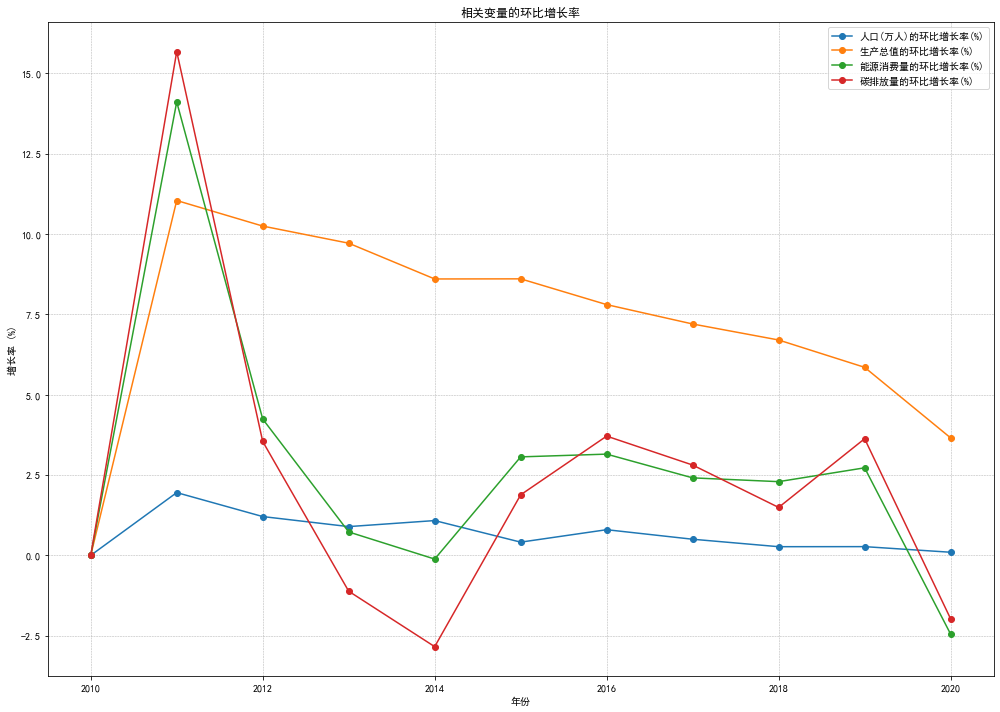

In [293]:
import matplotlib.pyplot as plt

columns = [
    "年份",
    "人口(万人)",
    "生产总值-GDP总量(亿元)",
    "能源消费量-能源消费量（万tce）",
    "碳排放量-碳排放量-总量(万tCO2)"
]

plt.figure(figsize=(14, 10))

for column in columns[1:]:
    plt.plot(growth_data['年份'], growth_data["{}的环比增长率(%)".format(column.split("-")[0])], 
             label="{}的环比增长率(%)".format(column.split("-")[0]), marker='o')

plt.title('相关变量的环比增长率')
plt.xlabel('年份')
plt.ylabel('增长率 (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### 要求2：建立各项指标间的关联关系模型

In [294]:
columns = ['年份', '人口的环比增长率(%)', '生产总值的环比增长率(%)', '能源消费量的环比增长率(%)','碳排放量的环比增长率(%)',
           "人口(万人)", "生产总值-GDP总量(亿元)", "能源消费量-能源消费量（万tce）",
           '能源消费量-第一产业-能源消费量-农林消费部门（万tce）', '能源消费量-第二产业-总量（万tce）',
           '能源消费量-第三产业-总量（万tce）', '能源消费量-居民生活-居民生活消费（万tce）','碳排放量-碳排放量-总量(万tCO2)',
           '碳排放量-第一产业-农林消费部门(万tCO2)', '碳排放量-第二产业-工业消费部门(万tCO2)',
            '碳排放量-第三产业-总量(万tCO2)', '碳排放量-居民生活-居民生活消费(万tCO2)']

In [295]:
data[columns].corr()

,人口的环比增长率(%),生产总值的环比增长率(%),能源消费量的环比增长率(%),碳排放量的环比增长率(%)
人口的环比增长率(%),1.000000,0.814117,0.766186,0.656585
生产总值的环比增长率(%),0.814117,1.000000,0.582192,0.442807
能源消费量的环比增长率(%),0.766186,0.582192,1.000000,0.974189
碳排放量的环比增长率(%),0.656585,0.442807,0.974189,1.000000


In [296]:
for i in columns:
    data[i] = data[i].map(float)
# data.dtypes

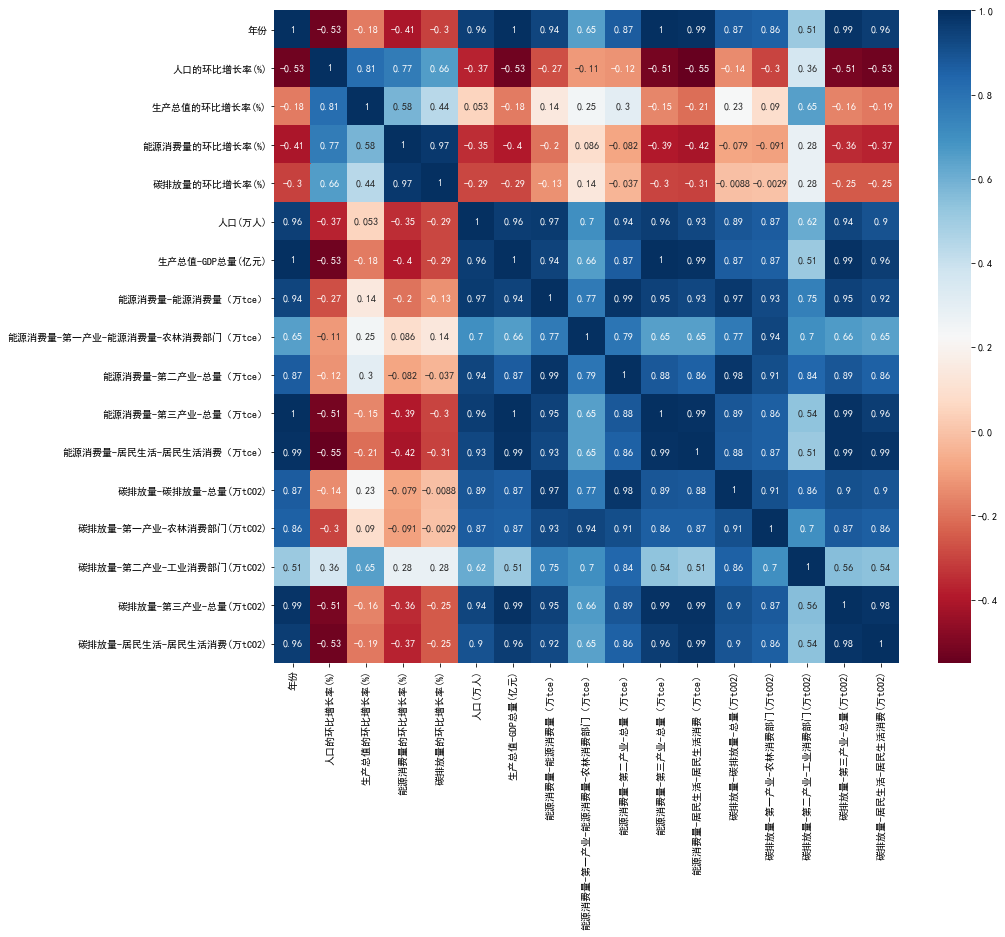

In [297]:
# 相关性矩阵热力图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
sns.heatmap(data[columns].corr(), annot=True, cmap='RdBu')

### 要求3：基于相关指标的变化，结合双碳政策与技术进步等多重效应，确定碳排放预测模型参数（如能源利用效率提升和非化石能源消费比重等）取值

+ 双碳政策：对碳排放的减少率产生影响
+ 技术进步：可以提高能源利用效率，从而减少单位能源消费对应的碳排放
+ 非化石能源消费比重：非化石能源（如太阳能、风能）的消费比重增加，从而减少碳排放

关键参数
+ 能源利用效率提升率：预计由于技术进步，能源利用效率将每年提高一定百分比。
+ 非化石能源消费增长率：预计非化石能源的消费比重将每年增长一定百分比。
+ 碳排放减少率：由于双碳政策的实施，预计碳排放将按一定的年均减少率下降。

#### 分析数据中的相关指标，找到能源利用效率和非化石能源消费比重的变化。

In [298]:
# 选取相关指标的数据
selected_columns = ['年份', '人口(万人)', '生产总值-GDP总量(亿元)', '能源消费量-能源消费量（万tce）']
subset_data = data[selected_columns]

# 计算能源利用效率，即每单位能源消耗下的GDP产出
subset_data['能源利用效率'] = subset_data['生产总值-GDP总量(亿元)'] / subset_data['能源消费量-能源消费量（万tce）']

# 计算能源利用效率的增长率
subset_data['能源利用效率增长率%'] = subset_data['能源利用效率'].pct_change().fillna(0) * 100

# 计算单位能源消费碳排放，即每单位能源消耗下的碳排放量
subset_data['单位能源消费碳排放'] = data['碳排放量-碳排放量-总量(万tCO2)'] / subset_data['能源消费量-能源消费量（万tce）']

# 计算单位能源消费碳排放减少率，取负数是因为减少碳排放是积极的改善
subset_data['单位能源消费碳排放减少率%'] = subset_data['单位能源消费碳排放'].pct_change().fillna(0) * -100

# 提取与分析相关的列
efficiency_data = subset_data[['年份', '能源利用效率', '能源利用效率增长率%', '单位能源消费碳排放', '单位能源消费碳排放减少率%']]
efficiency_data

,年份,能源利用效率,能源利用效率增长率%,单位能源消费碳排放,单位能源消费碳排放减少率%
0,2010.0,1.758075,0.000000,2.394295,-0.000000
1,2011.0,1.710819,-2.687900,2.427151,-1.372288
2,2012.0,1.809343,5.758884,2.410875,0.670588
3,2013.0,1.970709,8.918460,2.366739,1.830719
4,2014.0,2.142646,8.724645,2.302169,2.728194
5,2015.0,2.257797,5.374239,2.275804,1.145228
6,2016.0,2.359615,4.509624,2.288172,-0.543448
7,2017.0,2.469921,4.674735,2.297092,-0.389836
8,2018.0,2.576336,4.308426,2.279084,0.783940
9,2019.0,2.654755,3.043827,2.299164,-0.881054


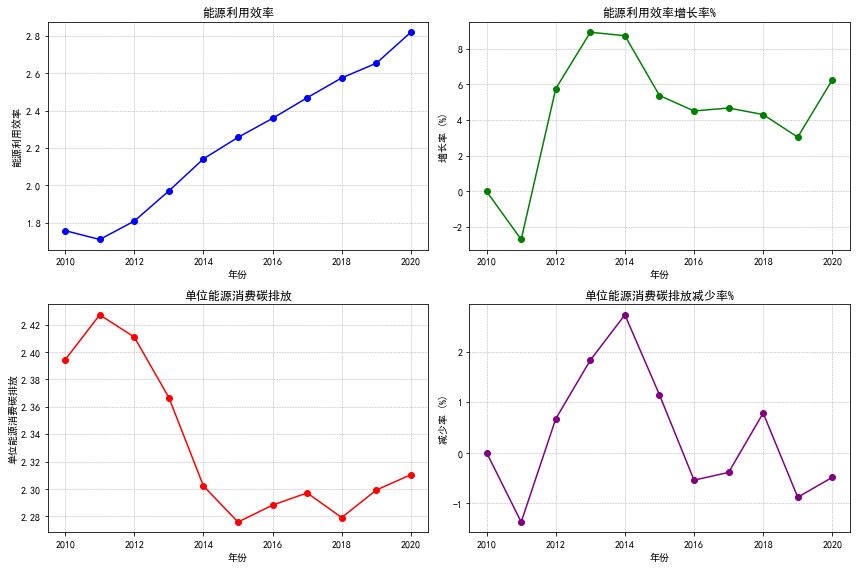

In [299]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

# 能源利用效率
plt.subplot(2, 2, 1)
plt.plot(efficiency_data['年份'], efficiency_data['能源利用效率'], marker='o', color='blue')
plt.title('能源利用效率')
plt.xlabel('年份')
plt.ylabel('能源利用效率')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 能源利用效率的增长率
plt.subplot(2, 2, 2)
plt.plot(efficiency_data['年份'], efficiency_data['能源利用效率增长率%'], marker='o', color='green')
plt.title('能源利用效率增长率%')
plt.xlabel('年份')
plt.ylabel('增长率 (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 单位能源消费碳排放
plt.subplot(2, 2, 3)
plt.plot(efficiency_data['年份'], efficiency_data['单位能源消费碳排放'], marker='o', color='red')
plt.title('单位能源消费碳排放')
plt.xlabel('年份')
plt.ylabel('单位能源消费碳排放')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 单位能源消费碳排放减少率%
plt.subplot(2, 2, 4)
plt.plot(efficiency_data['年份'], efficiency_data['单位能源消费碳排放减少率%'], marker='o', color='purple')
plt.title('单位能源消费碳排放减少率%')
plt.xlabel('年份')
plt.ylabel('减少率 (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

以往数据得出结论：
+ 从2010年到2020年，能源利用效率整体处于上涨趋势
+ 从2010年到2020年，单位能源消费碳排放呈现出波动的下降趋势，可能非化石能源的比例在增加，或者化石能源的使用效率在提高

关键参数取值
+ 能源利用效率提升率：可以假设未来每年能源利用效率将增长约4-6%(近几年能源利用效率增长率)
+ 非化石能源消费增长率：基于单位能源消费碳排放的下降趋势，可以假设非化石能源的消费比重将每年增长约1-3%。
+ 碳排放减少率：考虑到双碳政策的影响，我们可以假设未来碳排放将按约2-4%的年均减少率下降。

# 问题二：区域碳排放量以及经济、人口、能源消费量的预测模型

## （1）基于人口和经济变化的能源消费量预测模型

In [300]:
data.columns

Index(['单位GDP碳排放量', '单位能源消费量碳排放量', '单位GDP能源消费量', '生产总值的环比增长率(%)',
       '能源消费量的环比增长率(%)', '人口的环比增长率(%)', '碳排放量的环比增长率(%)', '年份', '人口(万人)',
       '生产总值-GDP总量(亿元)', '生产总值-第一产业-农林消费部门(亿元)', '生产总值-第二产业-总量(亿元)',
       '生产总值-第三产业-总量(亿元)', '能源消费量-能源消费量（万tce）',
       '能源消费量-第一产业-能源消费量-农林消费部门（万tce）', '能源消费量-第二产业-总量（万tce）',
       '能源消费量-第三产业-总量（万tce）', '能源消费量-居民生活-居民生活消费（万tce）', '产业能耗结构-第一产业',
       '产业能耗结构-第二产业', '产业能耗结构-第三产业', '产业能耗结构-居民生活-居民生活消费',
       '能耗品种结构-煤炭消费量-总量（万tce）', '能耗品种结构-油品消费量-总量（万tce）',
       '能耗品种结构-天然气消费量-总量（万tce）', '能耗品种结构-新能源-总量（万tce）',
       '能耗品种结构-外地调入电-总量（万tce）', '碳排放量-碳排放量-总量(万tCO2)',
       '碳排放量-第一产业-农林消费部门(万tCO2)', '碳排放量-第二产业-工业消费部门(万tCO2)',
       '碳排放量-第三产业-总量(万tCO2)', '碳排放量-居民生活-居民生活消费(万tCO2)', '能源消费部门碳排放因子-第一产业',
       '能源消费部门碳排放因子-第二产业', '能源消费部门碳排放因子-第三产业', '能源消费部门碳排放因子-居民生活-居民生活消费',
       '能源供应部门碳排放因子-发电', '能源供应部门碳排放因子-供热', '能源供应部门碳排放因子-其他转换',
       '能源供应部门碳排放因子-损失', '外地调入电力碳排放因子-外地调入电力碳排放因子'],
      dtype='object')

In [301]:
# 改变数据类型
data["年份"] = data["年份"].astype(object)

In [302]:
# 问题所涉及的指标
selected_columns = ['年份', '人口(万人)', '生产总值-GDP总量(亿元)', '能源消费量-能源消费量（万tce）']

subset_data = data[selected_columns]
subset_data

,年份,人口(万人),生产总值-GDP总量(亿元),能源消费量-能源消费量（万tce）
0,2010,7869.34,41383.870000,23539.314431
1,2011,8022.99,45952.650000,26860.025812
2,2012,8119.81,50660.200000,27999.218108
3,2013,8192.44,55580.110000,28203.104275
4,2014,8281.09,60359.430000,28170.505765
5,2015,8315.11,65552.000000,29033.608068
6,2016,8381.47,70665.706829,29947.976618
7,2017,8423.50,75752.201492,30669.886457
8,2018,8446.19,80827.711935,31373.126649
9,2019,8469.09,85556.133874,32227.505385


In [303]:
# 准备数据
time_data = data[["年份"]].astype(float).values
population_data = data[['人口(万人)']].astype(float).values
economic_data = data[['生产总值-GDP总量(亿元)']].astype(float).values
energy_data = data[["能源消费量-能源消费量（万tce）"]].astype(float).values

### 要求1：以2020年为基期，结合中国式现代化的两个时间节点（2035和2050），预测某区域十四五（2021-2025年）至二十一五（2056-2060年）期间人口、经济（GDP）和能源消费量变化

#### 人口预测模型

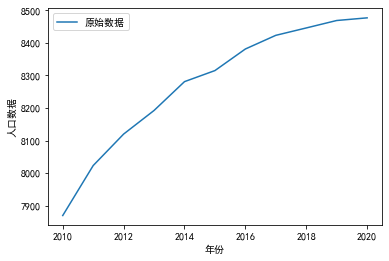

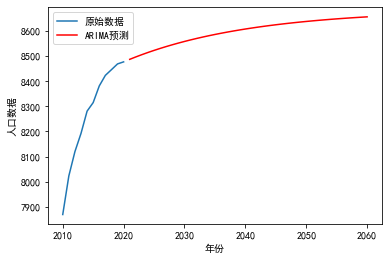

未来40年的人口预测:
2021年: 8487.33
2022年: 8496.90
2023年: 8506.02
2024年: 8514.69
2025年: 8522.94
2026年: 8530.80
2027年: 8538.27
2028年: 8545.38
2029年: 8552.15
2030年: 8558.58
2031年: 8564.71
2032年: 8570.54
2033年: 8576.09
2034年: 8581.36
2035年: 8586.39
2036年: 8591.17
2037年: 8595.71
2038年: 8600.04
2039年: 8604.16
2040年: 8608.08
2041年: 8611.80
2042年: 8615.35
2043年: 8618.73
2044年: 8621.94
2045年: 8625.00
2046年: 8627.90
2047年: 8630.67
2048年: 8633.31
2049年: 8635.81
2050年: 8638.20
2051年: 8640.46
2052年: 8642.62
2053年: 8644.68
2054年: 8646.63
2055年: 8648.49
2056年: 8650.26
2057年: 8651.95
2058年: 8653.55
2059年: 8655.08
2060年: 8656.53


In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 输入数据
years = time_data.reshape(-1)
population_data = population_data.reshape(-1)
# 创建时间序列
population_series = pd.Series(population_data, index=years)

# 绘制原始数据
plt.plot(population_series.index, population_series, label='原始数据')
plt.xlabel('年份')
plt.ylabel('人口数据')
plt.legend()
plt.show()

# 拟合ARIMA模型
order = (1, 1, 1)  # 这里选择ARIMA(1,1,1)作为示例，你可能需要根据实际情况调整参数
model = ARIMA(population_series, order=order)
result = model.fit()

# 预测未来人口
future_years = np.arange(2021, 2061)
forecast = result.get_forecast(steps=len(future_years))
forecast_mean_population = forecast.predicted_mean

# 绘制拟合曲线和原始数据
plt.plot(population_series.index, population_series, label='原始数据')
plt.plot(future_years, forecast_mean_population, color='red', label='ARIMA预测')
plt.xlabel('年份')
plt.ylabel('人口数据')
plt.legend()
plt.show()

# 打印未来人口预测结果
print("未来40年的人口预测:")
for year, population in zip(future_years, forecast_mean_population):
    print(f'{int(year)}年: {population:.2f}')

#### 经济预测模型

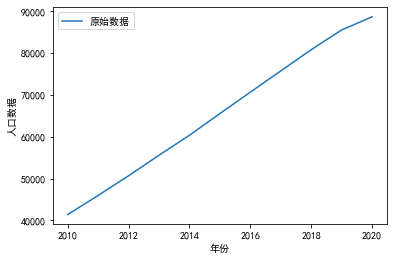

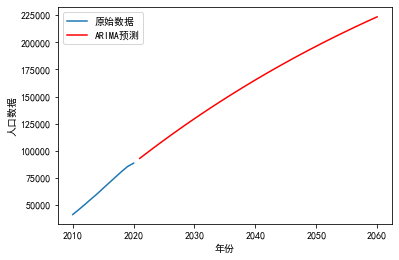

未来40年的经济预测:
2021年: 93038.06
2022年: 97333.01
2023年: 101568.87
2024年: 105746.47
2025年: 109866.59
2026年: 113930.04
2027年: 117937.60
2028年: 121890.02
2029年: 125788.08
2030年: 129632.52
2031年: 133424.07
2032年: 137163.46
2033年: 140851.41
2034年: 144488.64
2035年: 148075.83
2036年: 151613.67
2037年: 155102.85
2038年: 158544.03
2039年: 161937.87
2040年: 165285.03
2041年: 168586.14
2042年: 171841.85
2043年: 175052.76
2044年: 178219.51
2045年: 181342.70
2046年: 184422.92
2047年: 187460.78
2048年: 190456.84
2049年: 193411.69
2050年: 196325.89
2051年: 199200.01
2052年: 202034.59
2053年: 204830.17
2054年: 207587.31
2055年: 210306.51
2056年: 212988.31
2057年: 215633.21
2058年: 218241.74
2059年: 220814.38
2060年: 223351.63


In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 输入数据
years = time_data.reshape(-1)
economic_data = economic_data.reshape(-1)
# 创建时间序列
economic_series = pd.Series(economic_data, index=years)

# 绘制原始数据
plt.plot(economic_series.index, economic_series, label='原始数据')
plt.xlabel('年份')
plt.ylabel('人口数据')
plt.legend()
plt.show()

# 拟合ARIMA模型
order = (1, 1, 1)  # 这里选择ARIMA(1,1,1)作为示例，你可能需要根据实际情况调整参数
model = ARIMA(economic_series, order=order)
result = model.fit()

# 预测未来经济
future_years = np.arange(2021, 2061)
forecast = result.get_forecast(steps=len(future_years))
forecast_mean_economic = forecast.predicted_mean

# 绘制拟合曲线和原始数据
plt.plot(economic_series.index, economic_series, label='原始数据')
plt.plot(future_years, forecast_mean_economic, color='red', label='ARIMA预测')
plt.xlabel('年份')
plt.ylabel('人口数据')
plt.legend()
plt.show()

# 打印未来经济预测结果
print("未来40年的经济预测:")
for year, population in zip(future_years, forecast_mean_economic):
    print(f'{int(year)}年: {population:.2f}')

### 要求2：能源消费量与人口预测相关联，能源消费量与经济（GDP）预测相关联

#### 能源消耗量预测模型

采用多元线性回归  
+ 能源消费量=α×人口+β×GDP+γ  
+ 其中α 和 β 是系数，分别代表人口和GDP对能源消费量的影响，而 γ 是常数项  

In [306]:
from sklearn.linear_model import LinearRegression

# X是特征（人口和GDP总量），y是目标变量（能源消耗量）
X = subset_data[['人口(万人)', '生产总值-GDP总量(亿元)']]
y = subset_data['能源消费量-能源消费量（万tce）']

# 创建线性回归模型
reg = LinearRegression(fit_intercept=True,normalize=True,n_jobs=1).fit(X, y)

# 线性回归方程的一般形式：y = alpha * x1 + beta * x2 + gamma
# 其中，alpha和beta是特征的系数，gamma是截距
alpha, beta = reg.coef_  # 获取特征的系数
gamma = reg.intercept_  # 获取截距

# alpha表示人口(万人)的系数，beta表示GDP总量(亿元)的系数，gamma表示截距
alpha, beta, gamma

(10.15905666209251, 0.024630480769555225, -56613.85748968601)

In [307]:
# R²反应回归线的拟合程度
# R²的值越接近1，说明回归曲线对观测值的拟合程度越好；反之，R²的值越小，说明回归曲线对观测值的拟合程度越差
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

predicted_values = reg.predict(X)

# 模型评价结果
print('R2 Score:', r2_score(y, predicted_values))

#评价指标
mae = mean_absolute_error(y, predicted_values)  # 计算平均绝对误差
mse = mean_squared_error(y, predicted_values)  # 计算均方误差
rmse = np.sqrt(mse)  # 计算均方根误差

print("平均绝对误差 (MAE):{}".format(mae))
print("均方误差 (MSE):{}".format(mse))
print("均方根误差 (RMSE):{}".format(rmse))

R2 Score: 0.9395246229954289
平均绝对误差 (MAE):512.5814123780914
均方误差 (MSE):342974.99961178494
均方根误差 (RMSE):585.6406744854604


R2值：0.9395,这意味着模型解释了数据中93.95%的变化，表示模型有很好的拟合度。

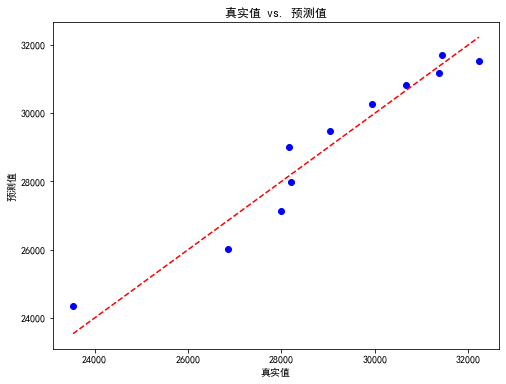

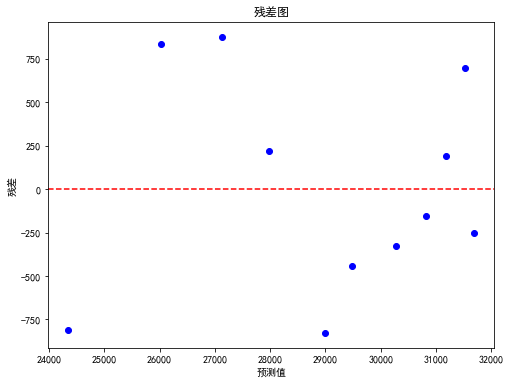

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 散点图
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.title("真实值 vs. 预测值")
plt.show()

# 残差图
residuals = y - predicted_values  # 计算残差
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue')  # 绘制散点图，蓝色表示预测值与残差的关系
plt.axhline(y=0, color='red', linestyle='--')  # 绘制水平参考线，红色虚线
plt.xlabel("预测值")
plt.ylabel("残差")
plt.title("残差图")
plt.show()

In [309]:
forecast_mean_energy = alpha * forecast_mean_population + beta * forecast_mean_economic + gamma

predictions = pd.DataFrame({
    '年份': np.arange(2021, 2061),
    '预测人口(万人)': forecast_mean_population,
    '预测GDP(亿元)': forecast_mean_economic,
    '预测能源消费量（万tce）': forecast_mean_energy
})
predictions

,年份,预测人口(万人),预测GDP(亿元),预测能源消费量（万tce）
11,2021,8487.326053,93038.064382,31900.941043
12,2022,8496.904422,97333.008748,32104.034789
13,2023,8506.018737,101568.871787,32300.958967
14,2024,8514.691478,105746.466223,32491.962000
15,2025,8522.944041,109866.593600,32677.280967
16,2026,8530.796780,113930.044435,32857.142145
17,2027,8538.269069,117937.598372,33031.761525
18,2028,8545.379338,121890.024330,33201.345302
19,2029,8552.145126,125788.080650,33366.090334
20,2030,8558.583124,129632.515241,33526.184593


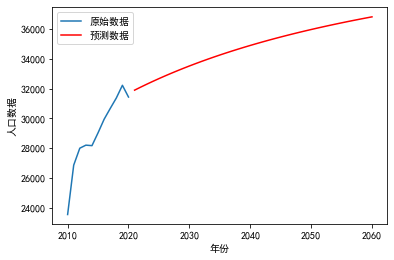

In [310]:
plt.plot(time_data, energy_data, label='原始数据')
plt.plot(future_years, forecast_mean_energy, color='red', label='预测数据')
plt.xlabel('年份')
plt.ylabel('人口数据')
plt.legend()
plt.show()

预测2021-2060年：
+ 人口增长速度逐渐放缓, 最后保持稳定

+ GDP持续增长，增长速度会逐渐放缓一点

+ 能源消费量持续增长，增长速度会逐渐放缓

## （2）区域碳排放量预测模型

### 要求1：碳排放量与人口、GDP和能源消费量预测相关联；

### 要求2：碳排放量与各能源消费部门（工业消费部门、建筑消费部门、交通消费部门、居民生活消费、农林消费部门）以及能源供应部门的能源消费量相关联（如反映能效提升对总能耗在上述能源消费部门分布的影响）；

### 要求3：碳排放量与各能源消费部门（同上）的能源消费品种（一次能源中化石能源消费与非化石能源消费以及二次能源（电或热）消费）以及能源供应部门的能源消费品种（化石能源发电与非化石能源发电）相关联（如反映非化石能源消费比重提升对各部门能源消费品种或碳排放因子的影响）。

In [350]:
data = pd.read_excel(r"G:/shuxuejianmo/能源相关数据.xlsx", sheet_name = 0)
data

,年份,生产总值-GDP总量(亿元),碳排放量-总量(万tCO2),能源消费量-总量（万tce）,能源消费量-第一产业-农林消费部门（万tce）,能源消费量-第二产业-能源供应部门-发电（万tce）,能源消费量-第二产业-能源供应部门-供热（万tce）,能源消费量-第二产业-能源供应部门-其他转换（万tce）,能源消费量-第二产业-能源供应部门-损失（万tce）,能源消费量-第二产业-工业消费部门（万tce）,能源消费量-第三产业-交通消费部门（万tce）,能源消费量-第三产业-建筑消费部门（万tce）,能源消费量-居民生活-居民生活消费（万tce）,人口-常驻人口(万人)
0,2010,41383.870000,56360.051842,23539.314431,345.355807,5752.095497,204.841186,-610.674104,454.130402,14312.679203,1398.261978,534.578837,1148.045626,7869.34
1,2011,45952.650000,65193.342227,26860.025812,393.867027,6992.753614,286.728604,243.372173,450.756974,15171.856589,1494.738671,620.825331,1205.126830,8022.99
2,2012,50660.200000,67502.613375,27999.218108,448.948695,7339.977973,354.093367,223.053143,457.500614,15494.592243,1618.152854,690.811109,1372.088109,8119.81
3,2013,55580.110000,66749.375697,28203.104275,362.176279,7820.622677,335.176454,-968.038174,353.566374,16347.809301,1743.670998,738.213382,1469.906984,8192.44
4,2014,60359.430000,64853.276040,28170.505765,383.723705,6951.048085,382.097747,-1181.686757,500.145621,17018.528790,1915.875700,728.321082,1472.451792,8281.09
5,2015,65552.000000,66074.809951,29033.608068,429.373902,7380.488915,440.863308,-1275.590758,474.011216,17242.190000,2019.285520,756.825100,1566.160865,8315.11
6,2016,70665.706829,68526.124672,29947.976618,433.462151,7786.515815,415.010090,-1334.320266,337.916484,17724.552643,2083.590841,794.942978,1706.305882,8381.47
7,2017,75752.201492,70451.557393,30669.886457,440.486350,8219.691060,523.977671,-1635.703187,377.270134,17832.320175,2187.957482,861.243914,1862.642859,8423.50
8,2018,80827.711935,71502.002860,31373.126649,457.994663,8104.870883,1010.789537,-2028.816904,370.152981,18123.659011,2324.653311,976.136263,2033.686903,8446.19
9,2019,85556.133874,74096.331081,32227.505385,438.576122,8131.547471,953.119994,-2376.429654,378.326635,19109.552361,2482.925054,1039.459718,2070.427685,8469.09


In [351]:
data.columns

Index(['年份', '生产总值-GDP总量(亿元)', '碳排放量-总量(万tCO2)', '能源消费量-总量（万tce）',
       '能源消费量-第一产业-农林消费部门（万tce）', '能源消费量-第二产业-能源供应部门-发电（万tce）',
       '能源消费量-第二产业-能源供应部门-供热（万tce）', '能源消费量-第二产业-能源供应部门-其他转换（万tce）',
       '能源消费量-第二产业-能源供应部门-损失（万tce）', '能源消费量-第二产业-工业消费部门（万tce）',
       '能源消费量-第三产业-交通消费部门（万tce）', '能源消费量-第三产业-建筑消费部门（万tce）',
       '能源消费量-居民生活-居民生活消费（万tce）', '人口-常驻人口(万人)'],
      dtype='object')

In [352]:
# 特征和目标变量
target_data = data[['碳排放量-总量(万tCO2)']].astype(float).values
features_data = data.drop(labels=["年份","碳排放量-总量(万tCO2)"], axis=1).astype(float).values
features_data.shape, target_data.shape

((11, 12), (11, 1))

数据预处理

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 分成训练集和测试集
test_size = 3
train_size = features_data.shape[0] - test_size
X_train, X_test = features_data[:train_size,:],features_data[train_size:,:]
y_train, y_test = target_data[:train_size,:],target_data[train_size:,:]

# 归一化
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_Y = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train)  
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_Y.fit_transform(y_train)  
y_test_scaled = scaler_Y.transform(y_test)

# 将输入数据调整为LSTM模型所需的形状 [samples, time steps, features]
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])  # 调整训练集特征形状
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])  # 调整测试集特征形状

X_train_reshaped.shape, X_test_reshaped.shape

((8, 1, 12), (3, 1, 12))

构建模型和训练

In [354]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM模型
model = Sequential()  # 创建一个序贯模型

# 添加LSTM层，50个神经元，输入形状为(input_shape)，这里是(1, 特征数量)
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# 添加输出层，一个神经元，用于回归问题
model.add(Dense(1))

# 编译模型，指定优化器和损失函数
model.compile(optimizer='adam', loss='mean_squared_error')

"""
epochs：迭代次数
batch_size：每个批次的样本数
validation_data：验证数据，用于评估模型性能
verbose：显示训练过程的详细程度（1表示显示进度条，0表示不显示）
shuffle：是否在每个时期之前打乱数据
"""
history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=1, validation_data=(X_test_reshaped, y_test_scaled), verbose=1, shuffle=False)

Train on 8 samples, validate on 3 samples
Epoch 1/100
8/8 [==============================] - 1s 108ms/step - loss: 0.4341 - val_loss: 0.9137
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2586 - val_loss: 0.4931
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.2081
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0561
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0069
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.0086
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0148
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0122
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0076
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0133 - va

8/8 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0225
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0226
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0227
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0227
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0228
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0228
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0228
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0228
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0229
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0229
Epoch 94/100
8/8 [===============

预测和评估

In [355]:
# from sklearn.metrics import mean_absolute_error

# 预测
y_pred_scaled = model.predict(X_test_reshaped)

# 将归一化的预测结果转换回原始比例
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

# 平均绝对百分比误差
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

# 模型评估
mapes = mape(y_test, y_pred)

# 打印MAPE值
print(f"Mean Absolute Percentage Error (MAPE): {mapes}")

Mean Absolute Percentage Error (MAPE): 2.6360421173923605


可视化损失曲线

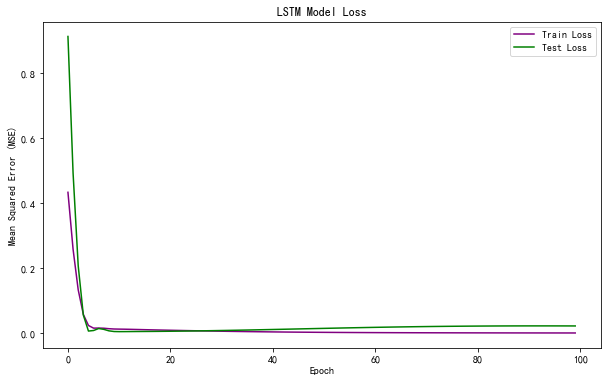

In [356]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='purple')  # 训练损失，用蓝色线表示
plt.plot(history.history['val_loss'], label='Test Loss', color='green')  # 验证损失，用橙色线表示
plt.title('LSTM Model Loss')  # 设置图形标题
plt.ylabel('Mean Squared Error (MSE)')  # 设置y轴标签
plt.xlabel('Epoch')  # 设置x轴标签
plt.legend(loc='upper right')  # 设置图例位置为右上角
plt.show()

可视化真实值vs预测值

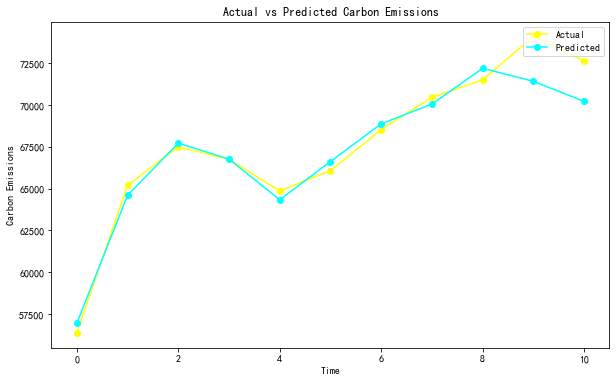

In [357]:
y_train_pred_scaled = model.predict(X_train_reshaped)
y_train_pred = scaler_Y.inverse_transform(y_train_pred_scaled)
y_test_pred = y_pred


plt.figure(figsize=(10, 6))
plt.plot(np.concatenate([y_train, y_test],axis=0), label='Actual', marker='o', color='yellow')
plt.plot(np.concatenate([y_train_pred, y_test_pred],axis=0), label='Predicted', marker='o', color='cyan')
plt.title('Actual vs Predicted Carbon Emissions')
plt.ylabel('Carbon Emissions')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.show()

In [358]:
# 对数据进行归一化处理
X_scaled = scaler_X.fit_transform(features_data)  # 归一化特征
y_scaled = scaler_Y.fit_transform(target_data)  # 归一化目标变量

# 调整数据形状以适应LSTM模型
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# 继续训练之前定义的LSTM模型
model.fit(X_reshaped, y_scaled, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 4/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/100
11/11 [=================

预测未来40年的碳排放

In [359]:
# 预测未来值
def predict_next_n(model, input_data, n):
    predictions = []
    current_input = input_data[-1].reshape(1, 1, -1)  # 当前输入数据，从最后一个时间步开始
    for _ in range(n):
        prediction = model.predict(current_input)  # 使用模型进行预测
        predictions.append(prediction)  # 将预测值添加到列表中
        current_input = np.roll(current_input, -1)  # 将输入数据向前滚动一个时间步
        current_input[0, 0, -1] = prediction  # 将滚动后的最后一个值设置为当前的预测值
    return np.array(predictions).reshape(-1, 1)  # 返回预测值的NumPy数组

# 预测未来的40个数据点
next_40 = predict_next_n(model, X_reshaped, 40)  # 预测未来40个数据点

# 将预测值转换回原始比例
next_40_original = scaler_Y.inverse_transform(next_40)  # 使用逆变换将预测值还原

# 问题三：区域双碳（碳达峰与碳中和）目标与路径规划方法

（1）情景设计（不少于三种情景，如无人为干预的自然情景、按时碳达峰与碳中和的基准情景、率先碳达峰与碳中和的雄心情景等）。
+ 要求1：与碳达峰和碳中和的时间节点相关联；
+ 要求2：与能效提升和非化石能源消费比重提升相关联

（2）多情景下碳排放量核算方法   
基本假设：    
假设1、2035年的GDP比基期（2020年）翻一番；2060年比基期翻两番；  
假设2、2060年生态碳汇的碳消纳量为基期碳排放量的10%；  
假设3、2060年工程碳汇或碳交易的碳消纳量为基期碳排放量10%。  
+ 要求1：区域碳排放与多情景假设相一致；
+ 要求2：区域碳排放与各部门碳排放量的总和相一致；
+ 要求3：碳排放量核算模型与问题二中预测模型相一致（即在多情景条件约束下，区域与各部门能源消费量、能源消费品种及其碳排放量预测方法相一致）

## （1）（2）多情景下碳排放量核算方法

In [360]:
# 最终预测数据
target_predictions = pd.DataFrame()
target_predictions['next_40_original'] = next_40_original.reshape(-1)
target_predictions

,next_40_original
0,72115.343750
1,69959.671875
2,69400.031250
3,74332.171875
4,73172.875000
5,72788.023438
6,77218.148438
7,77530.601562
8,76775.812500
9,76850.570312


### 无人为干预的自然情景

满足假设1:2035年的GDP比基期（2020年）翻一番；2060年比基期翻两番；

In [361]:
import pandas as pd

future_years = 40
future_data = pd.DataFrame({
    "年份": list(range(2021, 2021 + future_years))  # 创建年份列，从2021年开始，连续40年
})

# 给定的假设常驻人口(万人)	GDP总量(亿元)
gdp_2020 = data[data["年份"] == 2020]["生产总值-GDP总量(亿元)"].values[0]  # 获取2020年的GDP值
gdp_2035 = 2 * gdp_2020  # 假设2035年的GDP是2020年的两倍
gdp_2060 = 4 * gdp_2020  # 假设2060年的GDP是2020年的四倍

# 对GDP增长进行线性插值
future_data["生产总值-GDP总量(亿元)"] = future_data["年份"].apply(
    lambda x: gdp_2020 + (gdp_2035 - gdp_2020) * (x - 2020) / (2035 - 2020) if x <= 2035 
    else gdp_2035 + (gdp_2060 - gdp_2035) * (x - 2035) / (2060 - 2035)
)

future_data_=future_data.copy()
future_data

,年份,生产总值-GDP总量(亿元)
0,2021,94595.428937
1,2022,100507.643246
2,2023,106419.857554
3,2024,112332.071863
4,2025,118244.286172
5,2026,124156.500480
6,2027,130068.714789
7,2028,135980.929097
8,2029,141893.143406
9,2030,147805.357715


In [362]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import numpy as np

# 对现有的 GDP 数据进行归一化处理以获取缩放器
scaler_X_gdp = MinMaxScaler()
scaler_X_gdp.fit(data[["生产总值-GDP总量(亿元)"]])

# 使用缩放器对未来 GDP 数据进行归一化处理
future_gdp_normalized = scaler_X_gdp.transform(future_data[["生产总值-GDP总量(亿元)"]].values).reshape(-1)

# 定义一个辅助函数，使用未来 GDP 数据生成预测
def predict_next_n_with_gdp(model, input_data, future_gdp_normalized, n):
    predictions = []
    current_input = input_data[-1].reshape(1, 1, -1)
    for i in range(n):
        # 用假设中的未来 GDP 替换输入数据中的 GDP 值
        if i < len(future_gdp_normalized): 
            current_input[0, 0, 0] = future_gdp_normalized[i]
        prediction = model.predict(current_input)
        predictions.append(prediction)
        current_input = np.roll(current_input, -1)
        current_input[0, 0, -1] = prediction
    return np.array(predictions).reshape(-1, 1)

# 预测未来的 40 个数据点
next_40 = predict_next_n_with_gdp(model, X_reshaped, future_gdp_normalized, 40)

# 将预测值转换回原始比例
next_40_original = scaler_Y.inverse_transform(next_40)

In [363]:
target_predictions['自然情景'] = next_40_original
target_predictions

,next_40_original,自然情景
0,72115.343750,72257.218750
1,69959.671875,70375.117188
2,69400.031250,70172.500000
3,74332.171875,75308.929688
4,73172.875000,73975.273438
5,72788.023438,74813.492188
6,77218.148438,78903.992188
7,77530.601562,78641.554688
8,76775.812500,78400.687500
9,76850.570312,78701.609375


### 按时碳达峰与碳中和的基准情景和率先碳达峰与碳中和的雄心情景

基准情景 (Standard Scenario)：  
在基准情景下，我们假设将采取一系列的碳减排措施，以实现在2030年达到碳排放峰值，并在2060年实现碳中和。

调整方法：

+ 碳排放峰值：在2030年前，逐年降低碳排放增长率，确保2030年达到峰值。
+ 碳中和：从2030年开始，逐年降低碳排放量，直至2060年碳排放量接近零或达到一定的低水平。

雄心情景 (Ambitious Scenario)：   
在雄心情景下，我们假设将采取更加积极和进取的碳减排措施，以实现在2025年达到碳排放峰值，并在2050年实现碳中和。

调整方法：

+ 碳排放峰值：在2025年前，更快地降低碳排放增长率，确保2025年达到峰值。
+ 碳中和：从2025年开始，更快地降低碳排放量，确保2050年碳排放量接近零或达到一定的低水平。

具体调整方法可能包括以下策略：

+ 在预测的碳排放量基础上应用一个逐年递减的系数。
+ 使用非线性函数（如对数或指数函数）来调整碳排放量，使其更快地接近零。

In [428]:
# 基于自然情景下的调整
import math

def adjust_emissions(predictions, scenario, min_emission=0.2):
    # 调整后的预测数据
    adjusted_predictions = predictions.copy()

    # 根据不同的情景来执行不同的排放调整
    if scenario == "Standard":
        # "Standard"情景下的峰值年份是2030年
        peak_year = 2030 - 2020
        # 遍历从当前年份到峰值年份的年份
        for i in range(peak_year):
            # 计算一个示例的二次减少因子
            factor = 1 - (0.03 * i)**2
            # 使用因子来调整预测值，但确保不低于最小排放值
            adjusted_predictions[i] = max(min_emission, predictions[i] * factor)
        # 遍历从峰值年份之后的年份
        for i in range(peak_year, len(predictions)):
            # 计算另一个示例的二次减少因子
            factor = 1 - (0.02 * (i - peak_year))**2
            # 使用因子来调整预测值，但确保不低于最小排放值
            adjusted_predictions[i] = max(min_emission, predictions[peak_year] * factor)

    elif scenario == "Ambitious":
        # "Ambitious"情景下的峰值年份是2025年
        peak_year = 2025 - 2020
        # 遍历从当前年份到峰值年份的年份，执行类似的调整
        # 请注意，"Ambitious"情景下的减少因子不同
        for i in range(peak_year):
            factor = 1 - (0.04 * i)**2
            adjusted_predictions[i] = max(min_emission, predictions[i] * factor)
        for i in range(peak_year, len(predictions)):
            factor = 1 - (0.02 * (i - peak_year))**2
            adjusted_predictions[i] = max(min_emission, predictions[peak_year] * factor)

    # 返回调整后的预测数据
    return adjusted_predictions

standard_predictions = adjust_emissions(target_predictions["自然情景"], "Standard")
ambitious_predictions = adjust_emissions(target_predictions["自然情景"], "Ambitious")

In [453]:
import numpy as np

# 自然情景
natural_scenario = target_predictions["自然情景"].values

# 初始化数组基准和雄心
baseline_scenario = np.zeros_like(natural_scenario)
ambitious_scenario = np.zeros_like(natural_scenario)

# 定义碳达峰的时间
baseline_peak_year_index = 10
ambitious_peak_year_index = 5

# 定义衰减系数
baseline_decay_coefficient = 0.02
ambitious_decay_coefficient = 0.03

# 线性增长达到碳达峰
total_growth_baseline = natural_scenario[baseline_peak_year_index] - natural_scenario[0]  # 10% growth over natural
total_growth_ambitious = natural_scenario[ambitious_peak_year_index] - natural_scenario[0]  # 20% growth over natural

annual_growth_baseline = total_growth_baseline / 10
annual_growth_ambitious = total_growth_ambitious / 5


baseline_scenario[0] = natural_scenario[0]
ambitious_scenario[0] = natural_scenario[0]

# 基准情景
for i in range(1, len(natural_scenario)):
    if i <= baseline_peak_year_index:
        # 线性增长
        baseline_scenario[i] = baseline_scenario[i-1] + annual_growth_baseline
    else:
        # 2030->
        baseline_scenario[i] = baseline_scenario[i-1] * (1 - baseline_decay_coefficient)

for i in range(1, len(natural_scenario)):
    if i <= ambitious_peak_year_index:
        ambitious_scenario[i] = ambitious_scenario[i-1] + annual_growth_ambitious
    else:
        # 2025->
        ambitious_scenario[i] = ambitious_scenario[i-1] * (1 - ambitious_decay_coefficient)

In [454]:
data

,年份,生产总值-GDP总量(亿元),碳排放量-总量(万tCO2),能源消费量-总量（万tce）,能源消费量-第一产业-农林消费部门（万tce）,能源消费量-第二产业-能源供应部门-发电（万tce）,能源消费量-第二产业-能源供应部门-供热（万tce）,能源消费量-第二产业-能源供应部门-其他转换（万tce）,能源消费量-第二产业-能源供应部门-损失（万tce）,能源消费量-第二产业-工业消费部门（万tce）,能源消费量-第三产业-交通消费部门（万tce）,能源消费量-第三产业-建筑消费部门（万tce）,能源消费量-居民生活-居民生活消费（万tce）,人口-常驻人口(万人)
0,2010,41383.870000,56360.051842,23539.314431,345.355807,5752.095497,204.841186,-610.674104,454.130402,14312.679203,1398.261978,534.578837,1148.045626,7869.34
1,2011,45952.650000,65193.342227,26860.025812,393.867027,6992.753614,286.728604,243.372173,450.756974,15171.856589,1494.738671,620.825331,1205.126830,8022.99
2,2012,50660.200000,67502.613375,27999.218108,448.948695,7339.977973,354.093367,223.053143,457.500614,15494.592243,1618.152854,690.811109,1372.088109,8119.81
3,2013,55580.110000,66749.375697,28203.104275,362.176279,7820.622677,335.176454,-968.038174,353.566374,16347.809301,1743.670998,738.213382,1469.906984,8192.44
4,2014,60359.430000,64853.276040,28170.505765,383.723705,6951.048085,382.097747,-1181.686757,500.145621,17018.528790,1915.875700,728.321082,1472.451792,8281.09
5,2015,65552.000000,66074.809951,29033.608068,429.373902,7380.488915,440.863308,-1275.590758,474.011216,17242.190000,2019.285520,756.825100,1566.160865,8315.11
6,2016,70665.706829,68526.124672,29947.976618,433.462151,7786.515815,415.010090,-1334.320266,337.916484,17724.552643,2083.590841,794.942978,1706.305882,8381.47
7,2017,75752.201492,70451.557393,30669.886457,440.486350,8219.691060,523.977671,-1635.703187,377.270134,17832.320175,2187.957482,861.243914,1862.642859,8423.50
8,2018,80827.711935,71502.002860,31373.126649,457.994663,8104.870883,1010.789537,-2028.816904,370.152981,18123.659011,2324.653311,976.136263,2033.686903,8446.19
9,2019,85556.133874,74096.331081,32227.505385,438.576122,8131.547471,953.119994,-2376.429654,378.326635,19109.552361,2482.925054,1039.459718,2070.427685,8469.09


In [455]:
target_predictions["基准情景"] = baseline_scenario
target_predictions["雄心情景"] = ambitious_scenario
target_predictions["年份"] = np.arange(2021, 2061)
target_predictions["GDP总量"] = future_data["生产总值-GDP总量(亿元)"]
target_predictions

,next_40_original,自然情景,基准情景,雄心情景,年份,GDP总量,人口
0,72115.343750,72257.218750,72257.218750,72257.218750,2021,94595.428937,8463.456390
1,69959.671875,70375.117188,73018.031250,72768.476562,2022,100507.643246,8450.592868
2,69400.031250,70172.500000,73778.843750,73279.734375,2023,106419.857554,8443.045573
3,74332.171875,75308.929688,74539.656250,73790.992188,2024,112332.071863,8466.649420
4,73172.875000,73975.273438,75300.468750,74302.250000,2025,118244.286172,8466.812820
5,72788.023438,74813.492188,76061.281250,74813.507812,2026,124156.500480,8466.812820
6,77218.148438,78903.992188,76822.093750,72569.101562,2027,130068.714789,8466.649420
7,77530.601562,78641.554688,77582.906250,70392.031250,2028,135980.929097,8466.649420
8,76775.812500,78400.687500,78343.718750,68280.273438,2029,141893.143406,8466.649420
9,76850.570312,78701.609375,79104.531250,66231.867188,2030,147805.357715,8466.812820


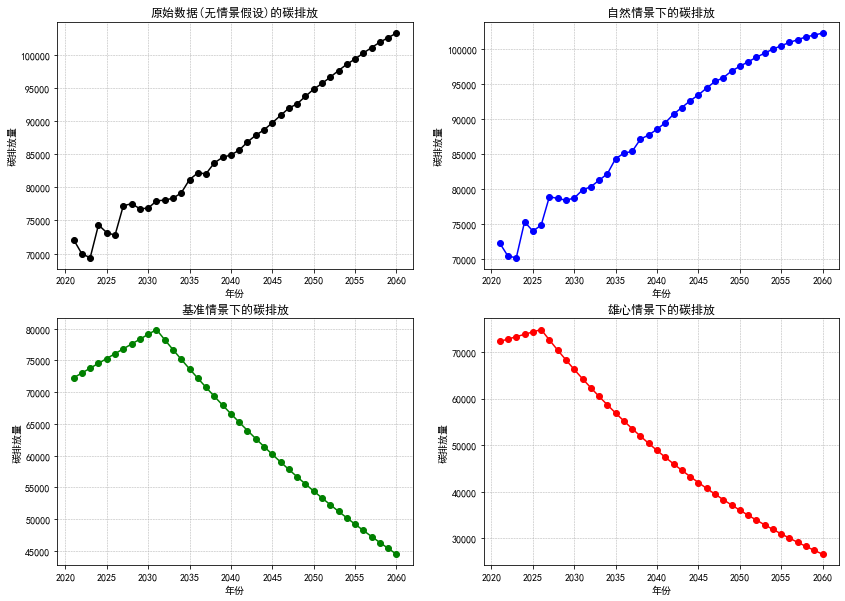

In [456]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(target_predictions['年份'], target_predictions['next_40_original'], marker='o', color='black')
plt.title('原始数据(无情景假设)的碳排放')
plt.xlabel('年份')
plt.ylabel('碳排放量')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(target_predictions['年份'], target_predictions['自然情景'], marker='o', color='blue')
plt.title('自然情景下的碳排放')
plt.xlabel('年份')
plt.ylabel('碳排放量')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 3)
plt.plot(target_predictions['年份'], target_predictions['基准情景'], marker='o', color='green')
plt.title('基准情景下的碳排放')
plt.xlabel('年份')
plt.ylabel('碳排放量')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(target_predictions['年份'], target_predictions['雄心情景'], marker='o', color='red')
plt.title('雄心情景下的碳排放')
plt.xlabel('年份')
plt.ylabel('碳排放量')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

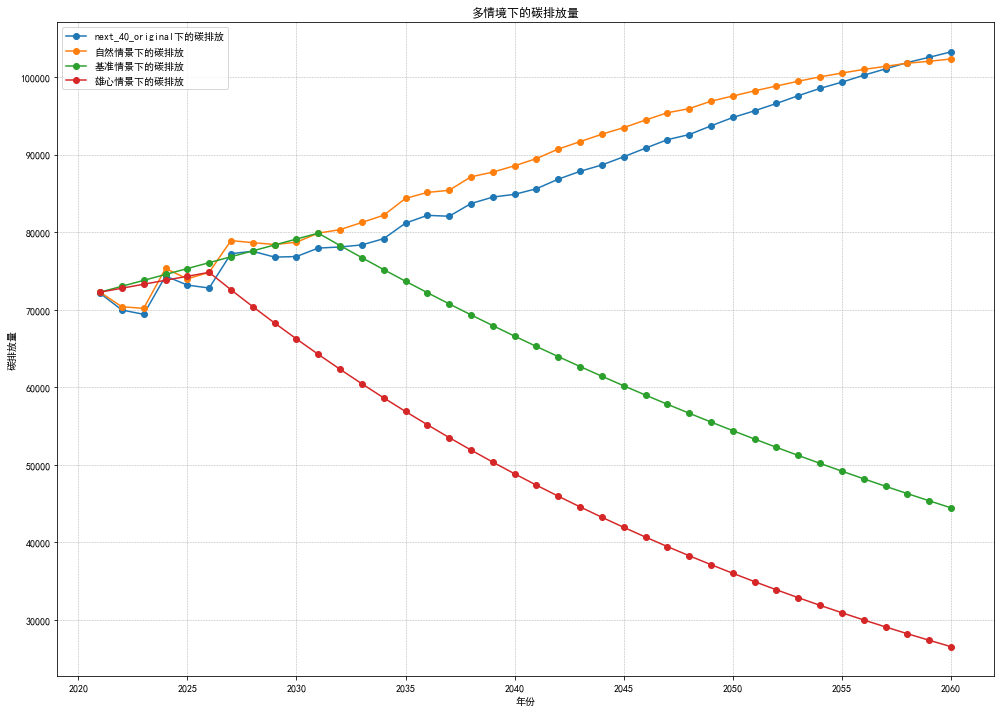

In [457]:
columns = ["年份","next_40_original","自然情景","基准情景","雄心情景"]

plt.figure(figsize=(14, 10))

for column in columns[1:]:
    plt.plot(target_predictions['年份'], target_predictions[column], 
             label="{}下的碳排放".format(column), marker='o')

plt.title('多情境下的碳排放量')
plt.xlabel('年份')
plt.ylabel('碳排放量')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## （3）确定双碳（碳达峰与碳中和）目标与路径

确定双碳目标对应的是基准情景

### 要求1：确定GDP、人口和能源消费量的目标值（2025年、2030年、2035年、2050年和2060年）

#### GDP

In [459]:
future_data

,年份,生产总值-GDP总量(亿元)
0,2021,94595.428937
1,2022,100507.643246
2,2023,106419.857554
3,2024,112332.071863
4,2025,118244.286172
5,2026,124156.500480
6,2027,130068.714789
7,2028,135980.929097
8,2029,141893.143406
9,2030,147805.357715


#### 人口

In [460]:
# 数据
X = data[['生产总值-GDP总量(亿元)','碳排放量-总量(万tCO2)']]
Y = data['人口-常驻人口(万人)']

In [461]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt

# 分割数据集
train_X,test_X,train_y,test_y = train_test_split(X,Y,test_size=0.3, random_state=20)

# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_X, train_y)
xgb_y_pred = xgb_model.predict(test_X)


# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(test_y, xgb_y_pred))
print('MAE:', mean_absolute_error(test_y, xgb_y_pred))
print('MSE:', mean_squared_error(test_y, xgb_y_pred))
print('RMSE:', sqrt(mean_squared_error(test_y, xgb_y_pred)))
# 构建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(train_X, train_y)
tree_y_pred = tree_model.predict(test_X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
print('R2 Score:', r2_score(test_y, tree_y_pred))
print('MAE:', mean_absolute_error(test_y, tree_y_pred))
print('MSE:', mean_squared_error(test_y, tree_y_pred))
print('MSE:', mean_squared_error(test_y, tree_y_pred))
print('RMSE:', sqrt(mean_squared_error(test_y, tree_y_pred)))

# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(train_X, train_y)
rf_y_pred = rf_model.predict(test_X)
rf_y_pred=np.round(rf_y_pred,0).astype(int)
# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(test_y, rf_y_pred))
print('MAE:', mean_absolute_error(test_y, rf_y_pred))
print('MSE:', mean_squared_error(test_y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(test_y, rf_y_pred)))

# 构建LGBM回归模型
lgbm_model = LGBMRegressor()
lgbm_model.fit(train_X, train_y)
lgbm_y_pred = lgbm_model.predict(test_X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
print('R2 Score:', r2_score(test_y, lgbm_y_pred))
print('MAE:', mean_absolute_error(test_y, lgbm_y_pred))
print('MSE:', mean_squared_error(test_y, lgbm_y_pred))
print('RMSE:', sqrt(mean_squared_error(test_y, lgbm_y_pred)))

# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(train_X, train_y)
ada_y_pred = ada_model.predict(test_X)

# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print('R2 Score:', r2_score(test_y, ada_y_pred))
print('MAE:', mean_absolute_error(test_y, ada_y_pred))
print('MSE:', mean_squared_error(test_y, ada_y_pred))
print('RMSE:', sqrt(mean_squared_error(test_y, ada_y_pred)))

# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(train_X, train_y)
gbdt_y_pred = gbdt_model.predict(test_X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print('R2 Score:', r2_score(test_y, gbdt_y_pred))
print('MAE:', mean_absolute_error(test_y, gbdt_y_pred))
print('MSE:', mean_squared_error(test_y, gbdt_y_pred))
print('RMSE:', sqrt(mean_squared_error(test_y, gbdt_y_pred)))

XGBoost模型评价结果：
R2 Score: 0.7405613376669307
MAE: 69.57289062499967
MSE: 7366.206090064199
RMSE: 85.82660479166235
决策树模型评价结果：
R2 Score: 0.7168162018563989
MAE: 67.10000000000036
MSE: 8040.398450000078
MSE: 8040.398450000078
RMSE: 89.66826891381409
随机森林模型评价结果：
R2 Score: 0.9599607259649581
MAE: 29.857500000000073
MSE: 1136.829575000012
RMSE: 33.71690340170657
LGBM模型评价结果：
R2 Score: -0.07505114890921538
MAE: 162.55967773437533
MSE: 30523.778719067857
RMSE: 174.710556976583
Adaboost模型评价结果：
R2 Score: 0.8853040598007109
MAE: 49.96375000000012
MSE: 3256.545981250035
RMSE: 57.06615442843538
GBDT模型评价结果：
R2 Score: 0.9670279142694185
MAE: 29.270303276846562
MSE: 936.1718740243808
RMSE: 30.596925891735935


选择GBDT模型

In [462]:
# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)
rf_y_pred = np.round(rf_y_pred,0).astype(int)
# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(Y, rf_y_pred))
print('MAE:', mean_absolute_error(Y, rf_y_pred))
print('MSE:', mean_squared_error(Y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, rf_y_pred)))

随机森林模型评价结果：
R2 Score: 0.967784710893401
MAE: 21.15909090909099
MSE: 1176.8080272727266
RMSE: 34.30463565281996


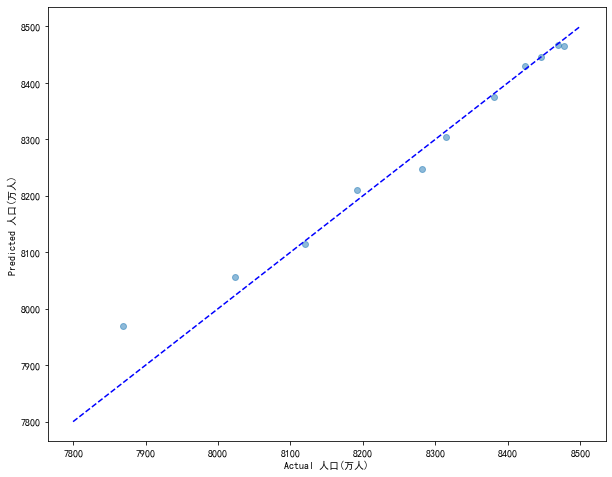

In [463]:
import matplotlib.pyplot as plt

# 可视化模型预测与实际值
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(Y, rf_y_pred, alpha=0.5)
ax.plot([7800, 8500], [7800, 8500], '--', color='blue')
ax.set_xlabel('Actual 人口(万人)')
ax.set_ylabel('Predicted 人口(万人)')
plt.show()

In [464]:
target_predictions.columns

Index(['next_40_original', '自然情景', '基准情景', '雄心情景', '年份', 'GDP总量', '人口'], dtype='object')

In [465]:
X_ = target_predictions[['GDP总量',"基准情景"]]
rf_y_pred = rf_model.predict(X_)
rf_y_pred

array([8463.45639   , 8466.81282   , 8466.64942   , 8466.64942   ,
       8466.64942   , 8466.64942   , 8466.64942   , 8466.64942   ,
       8466.64942   , 8466.64942   , 8466.64942   , 8466.64942   ,
       8466.64942   , 8466.64942   , 8466.64942   , 8463.45639   ,
       8451.55076833, 8429.32364667, 8393.77977167, 8359.208045  ,
       8360.627745  , 8360.627745  , 8360.627745  , 8360.627745  ,
       8336.25757   , 8336.25757   , 8336.25757   , 8336.25757   ,
       8336.25757   , 8336.25757   , 8336.25757   , 8336.25757   ,
       8336.25757   , 8336.25757   , 8336.25757   , 8336.25757   ,
       8336.25757   , 8336.25757   , 8336.25757   , 8336.25757   ])

In [466]:
target_predictions["人口"] = rf_y_pred
target_predictions

,next_40_original,自然情景,基准情景,雄心情景,年份,GDP总量,人口
0,72115.343750,72257.218750,72257.218750,72257.218750,2021,94595.428937,8463.456390
1,69959.671875,70375.117188,73018.031250,72768.476562,2022,100507.643246,8466.812820
2,69400.031250,70172.500000,73778.843750,73279.734375,2023,106419.857554,8466.649420
3,74332.171875,75308.929688,74539.656250,73790.992188,2024,112332.071863,8466.649420
4,73172.875000,73975.273438,75300.468750,74302.250000,2025,118244.286172,8466.649420
5,72788.023438,74813.492188,76061.281250,74813.507812,2026,124156.500480,8466.649420
6,77218.148438,78903.992188,76822.093750,72569.101562,2027,130068.714789,8466.649420
7,77530.601562,78641.554688,77582.906250,70392.031250,2028,135980.929097,8466.649420
8,76775.812500,78400.687500,78343.718750,68280.273438,2029,141893.143406,8466.649420
9,76850.570312,78701.609375,79104.531250,66231.867188,2030,147805.357715,8466.649420


#### 能源消耗量

使用问题二的模型预测能源消耗量

采用多元线性回归  
+ 能源消费量=α×人口+β×GDP+γ  
+ 其中α 和 β 是系数，分别代表人口和GDP对能源消费量的影响，而 γ 是常数项  

In [467]:
from sklearn.linear_model import LinearRegression

# X是特征（人口和GDP总量），y是目标变量（能源消耗量）
X = subset_data[['人口(万人)', '生产总值-GDP总量(亿元)']]
y = subset_data['能源消费量-能源消费量（万tce）']

# 创建线性回归模型
reg = LinearRegression(fit_intercept=True,normalize=True,n_jobs=1).fit(X, y)

# 线性回归方程的一般形式：y = alpha * x1 + beta * x2 + gamma
# 其中，alpha和beta是特征的系数，gamma是截距
alpha, beta = reg.coef_  # 获取特征的系数
gamma = reg.intercept_  # 获取截距

# alpha表示人口(万人)的系数，beta表示GDP总量(亿元)的系数，gamma表示截距
alpha, beta, gamma

(10.15905666209251, 0.024630480769555225, -56613.85748968601)

In [468]:
# R²反应回归线的拟合程度
# R²的值越接近1，说明回归曲线对观测值的拟合程度越好；反之，R²的值越小，说明回归曲线对观测值的拟合程度越差
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

predicted_values = reg.predict(X)

# 模型评价结果
print('R2 Score:', r2_score(y, predicted_values))

#评价指标
mae = mean_absolute_error(y, predicted_values)  # 计算平均绝对误差
mse = mean_squared_error(y, predicted_values)  # 计算均方误差
rmse = np.sqrt(mse)  # 计算均方根误差

print("平均绝对误差 (MAE):{}".format(mae))
print("均方误差 (MSE):{}".format(mse))
print("均方根误差 (RMSE):{}".format(rmse))

R2 Score: 0.9395246229954289
平均绝对误差 (MAE):512.5814123780914
均方误差 (MSE):342974.99961178494
均方根误差 (RMSE):585.6406744854604


In [469]:
# 人口和GDP作为变量
predicted_population = target_predictions["人口"]
predicted_gdp = target_predictions["GDP总量"]

# 预测模型函数
predicted_energy = alpha * np.array(predicted_population) + beta * np.array(predicted_gdp) + gamma
predicted_energy

array([31696.8064268 , 31876.52527019, 32020.48596116, 32166.10664199,
       32311.72732283, 32457.34800366, 32602.96868449, 32748.58936533,
       32894.21004616, 33039.83072699, 33185.45140783, 33331.07208866,
       33476.69276949, 33622.31345032, 33767.93413116, 33910.24077546,
       33964.03570735, 33912.97393591, 33726.62651279, 33550.15519968,
       33739.32282942, 33914.06764642, 34088.81246342, 34263.55728042,
       34190.72410873, 34365.46892573, 34540.21374273, 34714.95855973,
       34889.70337673, 35064.44819373, 35239.19301073, 35413.93782773,
       35588.68264473, 35763.42746173, 35938.17227872, 36112.91709572,
       36287.66191272, 36462.40672972, 36637.15154672, 36811.89636372])

In [470]:
target_predictions["能源消耗量"] = predicted_energy
target_predictions

,next_40_original,自然情景,基准情景,雄心情景,年份,GDP总量,人口,能源消耗量
0,72115.343750,72257.218750,72257.218750,72257.218750,2021,94595.428937,8463.456390,31696.806427
1,69959.671875,70375.117188,73018.031250,72768.476562,2022,100507.643246,8466.812820,31876.525270
2,69400.031250,70172.500000,73778.843750,73279.734375,2023,106419.857554,8466.649420,32020.485961
3,74332.171875,75308.929688,74539.656250,73790.992188,2024,112332.071863,8466.649420,32166.106642
4,73172.875000,73975.273438,75300.468750,74302.250000,2025,118244.286172,8466.649420,32311.727323
5,72788.023438,74813.492188,76061.281250,74813.507812,2026,124156.500480,8466.649420,32457.348004
6,77218.148438,78903.992188,76822.093750,72569.101562,2027,130068.714789,8466.649420,32602.968684
7,77530.601562,78641.554688,77582.906250,70392.031250,2028,135980.929097,8466.649420,32748.589365
8,76775.812500,78400.687500,78343.718750,68280.273438,2029,141893.143406,8466.649420,32894.210046
9,76850.570312,78701.609375,79104.531250,66231.867188,2030,147805.357715,8466.649420,33039.830727


### 要求2：确定提高能源利用效率和提高非化石能源消费比重的目标值（2025年、2030年、2035年、2050年和2060年）

In [483]:
# 计算能源利用效率，即每单位能源消耗下的GDP产出
target_predictions['能源利用效率'] = target_predictions['GDP总量'] / target_predictions['能源消耗量']

# 计算能源利用效率的增长率
target_predictions['能源利用效率增长率%'] = target_predictions['能源利用效率'].pct_change().fillna(0) * 100

# 计算单位能源消费碳排放，即每单位能源消耗下的碳排放量
target_predictions['单位能源消耗碳排放'] = target_predictions['基准情景'] / target_predictions['能源消耗量']

# 计算单位能源消费碳排放减少率，取负数是因为减少碳排放是积极的改善
target_predictions['单位能源消耗碳排放减少率%'] = target_predictions['单位能源消耗碳排放'].pct_change().fillna(0) * -100

In [484]:
target_predictions

,next_40_original,自然情景,基准情景,雄心情景,年份,GDP总量,人口,能源消耗量,能源利用效率,能源利用效率增长率%,单位能源消费碳排放,单位能源消费碳排放减少率%,单位能源消耗碳排放,单位能源消耗碳排放减少率%
0,72115.343750,72257.218750,72257.218750,72257.218750,2021,94595.428937,8463.456390,31696.806427,2.984384,0.000000,2.279637,-0.000000,2.279637,-0.000000
1,69959.671875,70375.117188,73018.031250,72768.476562,2022,100507.643246,8466.812820,31876.525270,3.153030,5.650966,2.290652,-0.483189,2.290652,-0.483189
2,69400.031250,70172.500000,73778.843750,73279.734375,2023,106419.857554,8466.649420,32020.485961,3.323493,5.406317,2.304114,-0.587678,2.304114,-0.587678
3,74332.171875,75308.929688,74539.656250,73790.992188,2024,112332.071863,8466.649420,32166.106642,3.492250,5.077690,2.317335,-0.573824,2.317335,-0.573824
4,73172.875000,73975.273438,75300.468750,74302.250000,2025,118244.286172,8466.649420,32311.727323,3.659485,4.788764,2.330438,-0.565407,2.330438,-0.565407
5,72788.023438,74813.492188,76061.281250,74813.507812,2026,124156.500480,8466.649420,32457.348004,3.825220,4.528915,2.343423,-0.557183,2.343423,-0.557183
6,77218.148438,78903.992188,76822.093750,72569.101562,2027,130068.714789,8466.649420,32602.968684,3.989475,4.293987,2.356291,-0.549146,2.356291,-0.549146
7,77530.601562,78641.554688,77582.906250,70392.031250,2028,135980.929097,8466.649420,32748.589365,4.152268,4.080580,2.369046,-0.541290,2.369046,-0.541290
8,76775.812500,78400.687500,78343.718750,68280.273438,2029,141893.143406,8466.649420,32894.210046,4.313621,3.885885,2.381687,-0.533609,2.381687,-0.533609
9,76850.570312,78701.609375,79104.531250,66231.867188,2030,147805.357715,8466.649420,33039.830727,4.473551,3.707560,2.394217,-0.526098,2.394217,-0.526098


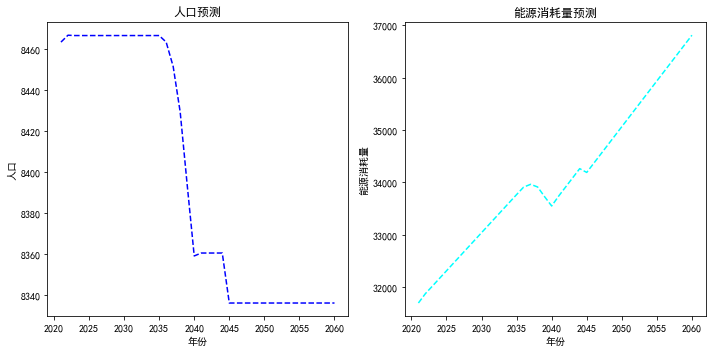

In [485]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# 人口预测
plt.subplot(1, 2, 1)
plt.plot(target_predictions["年份"], target_predictions["人口"], label="人口",linestyle='--', color="blue")
plt.title("人口预测")
plt.xlabel("年份")
plt.ylabel("人口")

# 能源消费量预测
plt.subplot(1, 2, 2)
plt.plot(target_predictions["年份"], target_predictions["能源消耗量"], label="能源消耗量", linestyle='--',  color="cyan")
plt.title("能源消耗量预测")
plt.xlabel("年份")
plt.ylabel("能源消耗量")

plt.tight_layout()
plt.show()

In [486]:
target_years = [2025, 2030, 2035, 2050, 2060]
target_values = target_predictions[target_predictions["年份"].isin(target_years)]
target_values[["年份", "GDP总量", "人口", "能源消耗量"]]

,年份,GDP总量,人口,能源消耗量
4,2025,118244.286172,8466.64942,32311.727323
9,2030,147805.357715,8466.64942,33039.830727
14,2035,177366.429257,8466.64942,33767.934131
29,2050,283786.286812,8336.25757,35064.448194
39,2060,354732.858515,8336.25757,36811.896364


In [487]:
analysis_columns = ["年份", "能源利用效率", "能源利用效率增长率%", "单位能源消耗碳排放", "单位能源消耗碳排放减少率%"]
analysis_values = target_values[analysis_columns]
analysis_values

,年份,能源利用效率,能源利用效率增长率%,单位能源消耗碳排放,单位能源消耗碳排放减少率%
4,2025,3.659485,4.788764,2.330438,-0.565407
9,2030,4.473551,3.707560,2.394217,-0.526098
14,2035,5.252511,3.002166,2.181515,2.422618
29,2050,8.093277,2.052971,1.551625,2.488385
39,2060,9.636365,1.556432,1.207609,2.465199


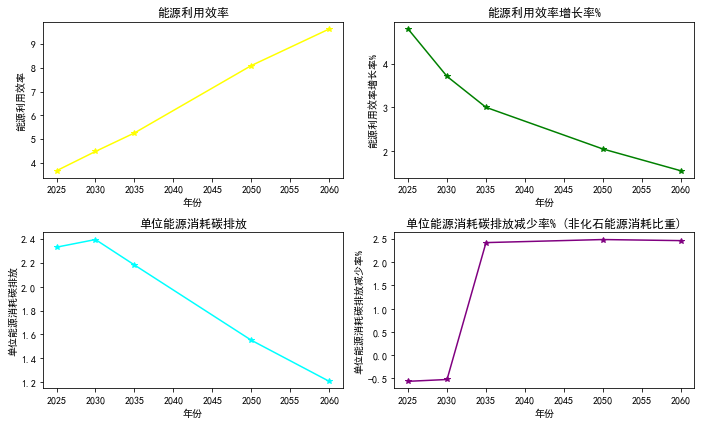

In [488]:
# Plotting the key variables for descriptive analysis

plt.figure(figsize=(10, 6))

# 能源利用效率
plt.subplot(2, 2, 1)
plt.plot(analysis_values["年份"], analysis_values["能源利用效率"], marker='*', color="yellow", linestyle='-')
plt.title("能源利用效率")
plt.xlabel("年份")
plt.ylabel("能源利用效率")


# 能源利用效率增长率%
plt.subplot(2, 2, 2)
plt.plot(analysis_values["年份"], analysis_values["能源利用效率增长率%"], marker='*', color="green", linestyle='-')
plt.title("能源利用效率增长率%")
plt.xlabel("年份")
plt.ylabel("能源利用效率增长率%")


# 单位能源消费碳排放
plt.subplot(2, 2, 3)
plt.plot(analysis_values["年份"], analysis_values["单位能源消耗碳排放"], marker='*', color="cyan", linestyle='-')
plt.title("单位能源消耗碳排放")
plt.xlabel("年份")
plt.ylabel("单位能源消耗碳排放")


# 单位能源消费碳排放减少率%
plt.subplot(2, 2, 4)
plt.plot(analysis_values["年份"], analysis_values["单位能源消耗碳排放减少率%"], marker='*', color="purple", linestyle='-')
plt.title("单位能源消耗碳排放减少率% (非化石能源消耗比重)")
plt.xlabel("年份")
plt.ylabel("单位能源消耗碳排放减少率%")

plt.tight_layout()
plt.show()

### 要求3：完成能效提升、产业（产品）升级、能源脱碳和能源消费电气化的定性与定量分析

#### 能效提升：分析能源利用效率和其增长率

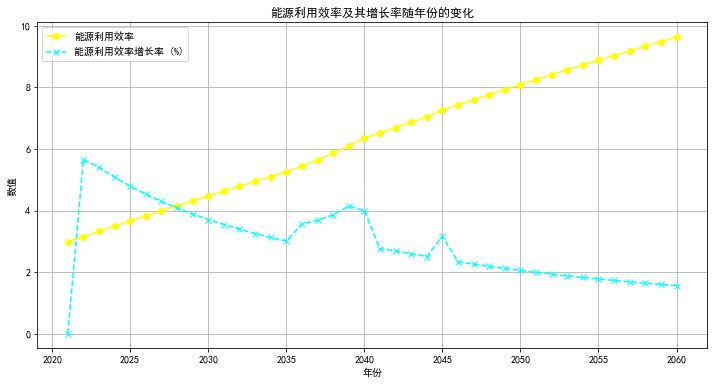

In [489]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(target_predictions['年份'], target_predictions['能源利用效率'], label='能源利用效率', marker='o', color='yellow')

plt.plot(target_predictions['年份'], target_predictions['能源利用效率增长率%'], label='能源利用效率增长率 (%)', linestyle='--', marker='x', color="cyan")

plt.xlabel('年份')
plt.ylabel('数值')

plt.title('能源利用效率及其增长率随年份的变化')

plt.legend()
plt.grid(True)

plt.show()

能效提升:   
数据显示，在未来几年内，能源利用效率预计将持续提高。这可能是由于技术进步、能源使用的优化以及能源效率项目的实施。 能源利用效率的增长率表明，尽管能效正在提高，但增长的速度可能会放缓。这可能是因为在初期，通过技术和管理的改进，容易实现大幅度的能效提升，但随着时间的推移，进一步的提升将更加困难

#### 产业（产品）升级：分析GDP总量和碳排放量的关系

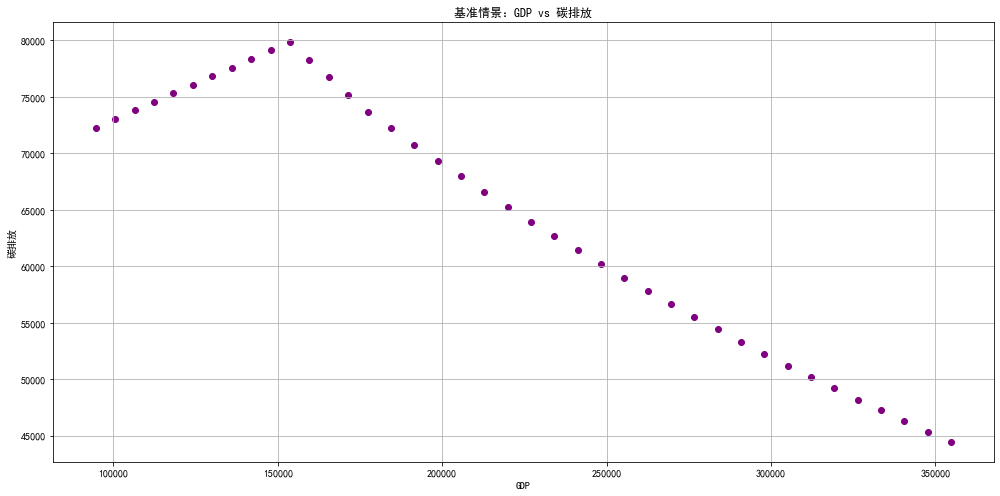

In [490]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.scatter(target_predictions['GDP总量'], target_predictions['基准情景'], color='purple', label='基准情景')
plt.xlabel('GDP')
plt.ylabel('碳排放')
plt.title('基准情景：GDP vs 碳排放')
plt.grid(True)

plt.tight_layout()
plt.show()

#### 能源脱碳：分析单位能源消费碳排放和其减少率

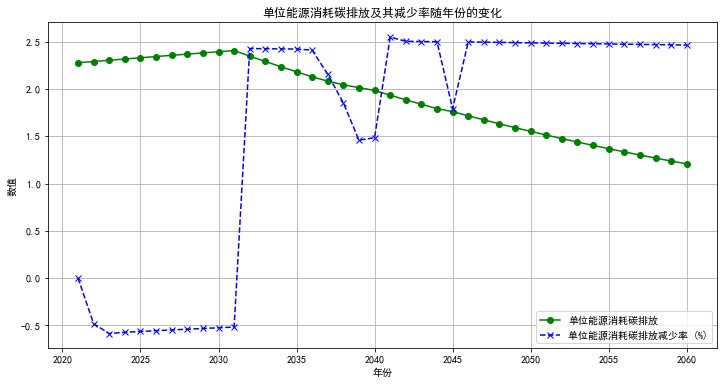

In [491]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(target_predictions['年份'], target_predictions['单位能源消耗碳排放'], label='单位能源消耗碳排放', marker='o', color='green')
plt.plot(target_predictions['年份'], target_predictions['单位能源消耗碳排放减少率%'], label='单位能源消耗碳排放减少率 (%)', linestyle='--', marker='x', color='blue')

plt.xlabel('年份')
plt.ylabel('数值')

plt.title('单位能源消耗碳排放及其减少率随年份的变化')

plt.legend()
plt.grid(True)

plt.show()

单位能源消费碳排放：随时间呈下降趋势，表明每单位能源消费的碳排放量正在减少。可能原因是能源改变、可再生能源的增加和燃料效率的提高  
单位能源消费碳排放减少率%：在未来的预测中出现了波动

#### 能源消费电气化：分析能源消耗量的增长趋势

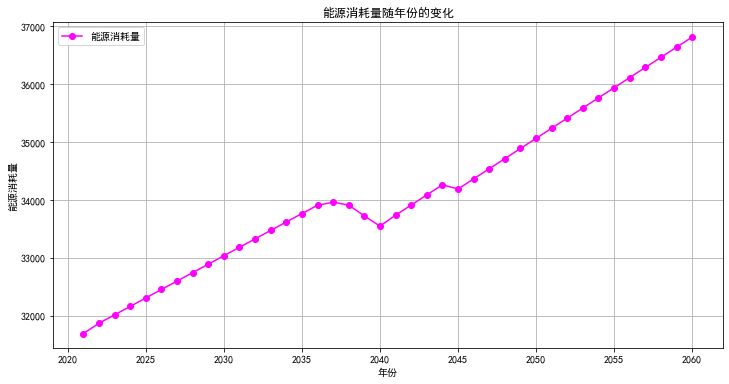

In [494]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(target_predictions['年份'], target_predictions['能源消耗量'], label='能源消耗量', marker='o', color='magenta')

plt.xlabel('年份')
plt.ylabel('能源消耗量')
plt.title('能源消耗量随年份的变化')

plt.legend()
plt.grid(True)

plt.show()

能源消费电气化：  
总体能源消费量正在增加，但单位能源消费碳排放正在下降，这意味着能源消费的来源可能正在发生变化，这可能意味着更多的能源来自电力，而不是传统的化石燃料，这可能是由于电气化的推进、可再生能源的使用增加以及对电力基础设施的投资